# Big Tech Stock Predictor

The goal of this project is to use AAPL stock as a tool to leverage different machine learning and deep learning regressors to predict the stock price / movement across an array of intervals to see how accurate ML / DL models can be.

**What is being predicted?**

The predicted feature for this research is the adjusted close as this is the standard for comparing price of a security irregardless of security splits / other external factors, and thus this will be the target feature that the regressors will be trying to estimate.

# Data Pre-Processing

In this step, we are preparing the data to be used in training the models.

Note that feature engineering has already been performed manually on this dataset to add in extra columns, and thus the resulting CSV file is already engineered. I added in manually the column for Earnings (0 representing non-earnings the next day and 1 representing an earnings report the following day), and also predicted EPS (earnings per share) and actual EPS columns.

Citation for AAPL stock inital data: https://www.kaggle.com/datasets/evangower/big-tech-stock-prices/?select=AAPL.csv

Citation for Earnings, Predicted and Actual EPS data: https://www.alphaquery.com/stock/AAPL/earnings-history

Note also that our target variable - actual adj close - varies depending on the time frame we are trying to predict as it shifts depending on how far out we are attempting to forecast.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

df_aapl = pd.read_csv('AAPL.csv')

df_aapl = df_aapl.dropna(subset=['Date'])

# Convert the 'Date' column to datetime type
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])

# Extract the timestamp from the datetime and convert it to float
df_aapl['Date'] = df_aapl['Date'].apply(lambda x: x.timestamp())

# Visualization of features

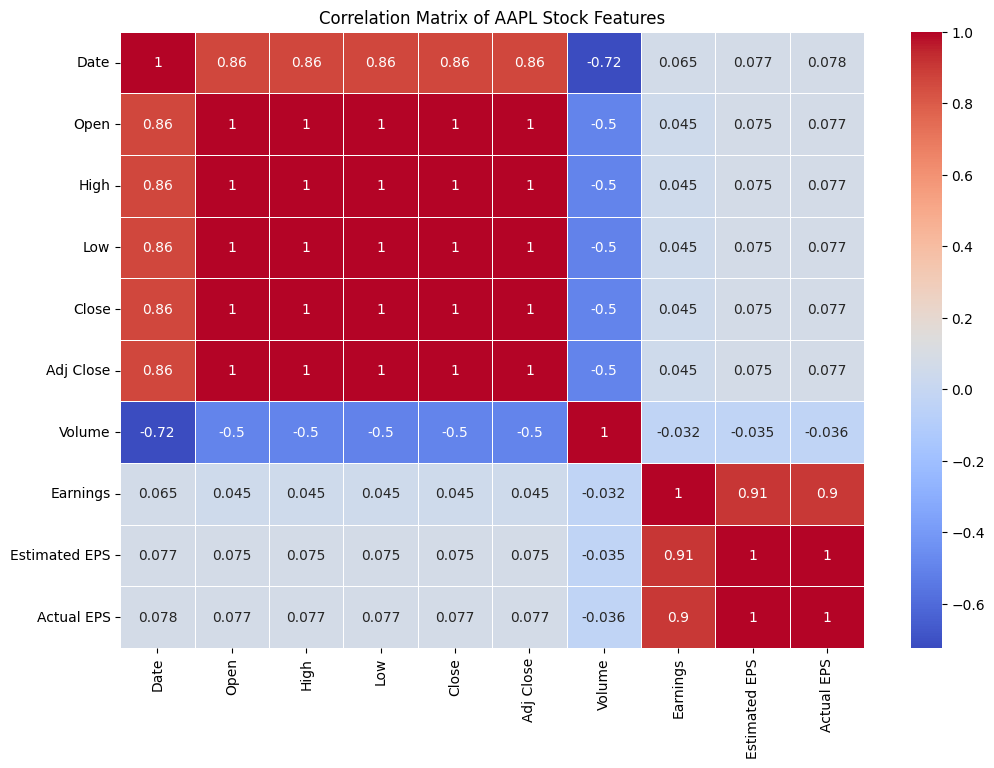

In [2]:
correlation_matrix = df_aapl.corr()

plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Correlation Matrix of AAPL Stock Features')
plt.show()

# Manage US Stock Market Open days + Forecast 10-yr Predictions

In [3]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta, MO

# Define the start and end dates
start_date = datetime(2023, 1, 2)  # Monday, January 2, 2023
end_date = datetime(2033, 12, 31)

# Define a list of holidays to exclude
holidays = [datetime(2023, 1, 1),
            datetime(2023, 7, 4),
            datetime(2023, 12, 24),
            datetime(2023, 12, 25),
            datetime(2024, 1, 1),
            datetime(2024, 7, 4),
            datetime(2024, 12, 24),
            datetime(2024, 12, 25),
            datetime(2025, 1, 1),
            datetime(2025, 7, 4),
            datetime(2025, 12, 24),
            datetime(2025, 12, 25),
            datetime(2026, 1, 1),
            datetime(2026, 7, 4),
            datetime(2026, 12, 24),
            datetime(2026, 12, 25),
            datetime(2027, 1, 1),
            datetime(2027, 7, 4),
            datetime(2027, 12, 24),
            datetime(2027, 12, 25),
            datetime(2028, 1, 1),
            datetime(2028, 7, 4),
            datetime(2028, 12, 24),
            datetime(2028, 12, 25),
            datetime(2029, 1, 1),
            datetime(2029, 7, 4),
            datetime(2029, 12, 24),
            datetime(2029, 12, 25),
            datetime(2030, 1, 1),
            datetime(2030, 7, 4),
            datetime(2030, 12, 24),
            datetime(2030, 12, 25),
            datetime(2031, 1, 1),
            datetime(2031, 7, 4),
            datetime(2031, 12, 24),
            datetime(2031, 12, 25),
            datetime(2032, 1, 1),
            datetime(2032, 7, 4),
            datetime(2032, 12, 24),
            datetime(2032, 12, 25),
            datetime(2033, 1, 1),
            datetime(2033, 7, 4),
            datetime(2033, 12, 24),
            datetime(2033, 12, 25)]  # Add more holidays as needed

# Function to check if a date is a weekday and not a holiday
def is_weekday_and_not_holiday(date):
    return date.weekday() < 5 and date not in holidays

# Loop through the dates and print weekdays
current_date = start_date
while current_date <= end_date:
    if is_weekday_and_not_holiday(current_date):
        if (current_date.month == 1 and 15 <= current_date.day <= 21 and current_date.weekday() == 0):
            # Skip MLK Day (Observed Holiday)
            current_date = datetime(current_date.year, current_date.month, current_date.day + 1)
        if (current_date.month == 2 and 15 <= current_date.day <= 21 and current_date.weekday() == 0):
            # Skip President's Day (Observed Holiday)
            current_date = datetime(current_date.year, current_date.month, current_date.day + 1)
        if (current_date.month == 6 and 15 <= current_date.day <= 21 and current_date.weekday() == 0):
            # Skip Juneteenth (Observed Holiday)
            current_date = datetime(current_date.year, current_date.month, current_date.day + 1)
        if (current_date.month == 11 and 22 <= current_date.day <= 28 and current_date.weekday() == 3):
            # Skip Thanksgiving (Observed Holiday)
            current_date = datetime(current_date.year, current_date.month, current_date.day + 1)
        if (current_date.month == 9 and current_date.day <= 7 and current_date.weekday() == 3):
            # Skip Labor Day (Observed Holiday)
            current_date = datetime(current_date.year, current_date.month, current_date.day + 1)
        if (current_date.month == 5 and current_date + timedelta(days=7) > datetime(current_date.year, 6, 1) and current_date.weekday() == 0):
            # Skip Memorial Day (Observed Holiday)
            if (current_date + timedelta(days=1) == datetime(current_date.year, 6, 1)):
                current_date = datetime(current_date.year, 6, 1)
            else:
                current_date = datetime(current_date.year, current_date.month, current_date.day + 1)
        print(current_date.strftime("%Y-%m-%d"))
    current_date += timedelta(days=1)

2023-01-02
2023-01-03
2023-01-04
2023-01-05
2023-01-06
2023-01-09
2023-01-10
2023-01-11
2023-01-12
2023-01-13
2023-01-17
2023-01-18
2023-01-19
2023-01-20
2023-01-23
2023-01-24
2023-01-25
2023-01-26
2023-01-27
2023-01-30
2023-01-31
2023-02-01
2023-02-02
2023-02-03
2023-02-06
2023-02-07
2023-02-08
2023-02-09
2023-02-10
2023-02-13
2023-02-14
2023-02-15
2023-02-16
2023-02-17
2023-02-21
2023-02-22
2023-02-23
2023-02-24
2023-02-27
2023-02-28
2023-03-01
2023-03-02
2023-03-03
2023-03-06
2023-03-07
2023-03-08
2023-03-09
2023-03-10
2023-03-13
2023-03-14
2023-03-15
2023-03-16
2023-03-17
2023-03-20
2023-03-21
2023-03-22
2023-03-23
2023-03-24
2023-03-27
2023-03-28
2023-03-29
2023-03-30
2023-03-31
2023-04-03
2023-04-04
2023-04-05
2023-04-06
2023-04-07
2023-04-10
2023-04-11
2023-04-12
2023-04-13
2023-04-14
2023-04-17
2023-04-18
2023-04-19
2023-04-20
2023-04-21
2023-04-24
2023-04-25
2023-04-26
2023-04-27
2023-04-28
2023-05-01
2023-05-02
2023-05-03
2023-05-04
2023-05-05
2023-05-08
2023-05-09
2023-05-10

# I would like to do a feature seaborn correlation graph to see how correlated features are. Maybe PCA analysis too?

# Linear Regression Model

**Next Day Prediction (non-earnings eve)**

Uses non-earnings eve rows (ie rows where the next day is not an earnings day) to forecast AAPL stock price predictions for the next day

Overall size of predictions for a day (non-earnings) out: 648
Overall modified Accuracy
0.9715701275837894
Mean Squared Error (adj price in dollars amount off): 2.6163024315690344
Custom Prediction for next day, actual adj close is 51.719452
Linear Regression model predicted for next day: [53.75091899]
Accuracy of Custom Prediction:
[96.07214132]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


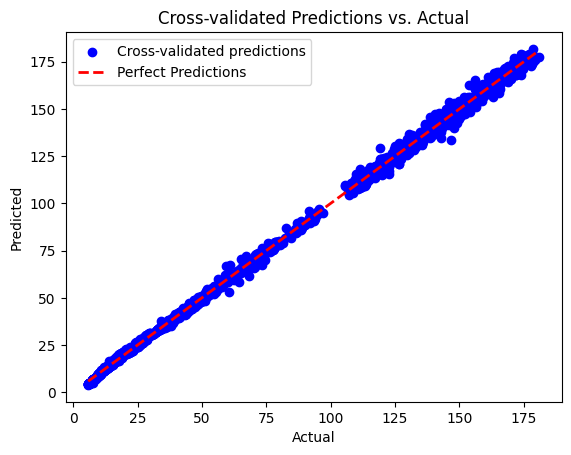

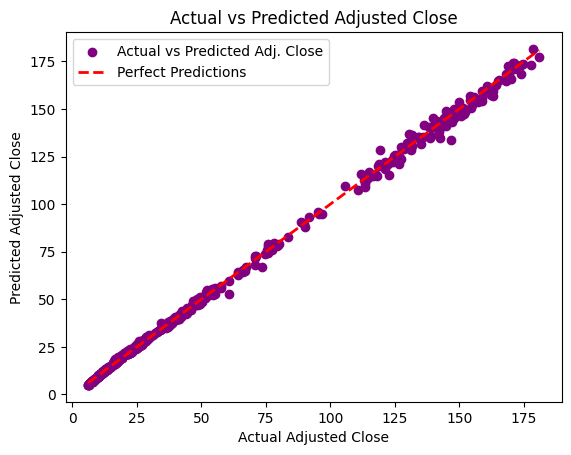

In [4]:
# Assign the target adj close (what we are trying to predict)
# to be the subsequent row's adjusted close on the following day
df_aapl['Target Adj Close'] = df_aapl['Adj Close'].shift(-1)

# Drop the last row to handle NaN values created by the shift
df_aapl = df_aapl.dropna()

# Only keep the  non-earnings rows (ie where Earnings != 1)
df_aapl_non = df_aapl[df_aapl['Earnings'] != 1]

# Separate the features (X) and target variable (y) which is the target adjusted close
# see report / text comments for further explanation
y_aapl = df_aapl_non['Target Adj Close']

# Note that we drop the expected EPS and acutal EPS since this is for a non-earnings day sequence, which means that EPS data is not relevant
# since we are not considered earnings per share (EPS) estimates
X_aapl = df_aapl_non.drop(['Adj Close', 'Target Adj Close', 'Date', 'Estimated EPS', 'Actual EPS'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_aapl, y_aapl, test_size=0.2)

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
linear_regression_model = LinearRegression()

# Perform cross-validated predictions
predicted = cross_val_predict(linear_regression_model, X_aapl, y_aapl, cv=10)

# Train the regression model on the scaled training data
linear_regression_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
predictions = linear_regression_model.predict(X_test_scaled)

# Create a DataFrame with cross-validated predictions
results_df = pd.DataFrame({'Predicted': predictions, 'Actual': y_test})
# Zip the predictions and test values together for ease
results_tuples = list(zip(predictions, y_test))

print(f"Overall size of predictions for a day (non-earnings) out: {len(results_df)}")

# This accuracy represents how "off" the results are between our prediction for each row and the actual value
# of the adjusted close (using abs val)
Abs_accuracy = (1 - np.abs(1 - results_df['Predicted'] / results_df['Actual']))
print("Overall modified Accuracy")
print(np.mean(Abs_accuracy))

# Evaluate the performance of the regression model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (adj price in dollars amount off): {mse}")

# Takes in open, high, low, close, volume, earnings (0 for non earnings tomorrow 1 for earnings tomorrow)
# below is an example value of a non-earnings day sequence provided as an example (10/23/2018)
custom_values = np.array([[53.957500,55.812500,53.674999,55.682499,155071200,0]])

# This would be the next day after the above date (10/24/2018)
actual_adj_value = 51.719452

# Scale the custom input values using a standard scaker
custom_values_scaled = scaler.transform(custom_values)

# Make predictions with the linear regression model
# for our custom values (test example 10/23/2018 predicting 10/24/2018)
custom_predictions = linear_regression_model.predict(custom_values_scaled)

# Print the predictions
print(f"Custom Prediction for next day, actual adj close is {actual_adj_value}")
print(f"Linear Regression model predicted for next day: {custom_predictions}")

print("Accuracy of Custom Prediction:")
print((1 - np.abs(1 - custom_predictions / actual_adj_value)) * 100)

# Plot the results of cross-validated predictions
plt.scatter(y_aapl, predicted, color='blue', label='Cross-validated predictions')
plt.plot([y_aapl.min(), y_aapl.max()], [y_aapl.min(), y_aapl.max()], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Cross-validated Predictions vs. Actual')
plt.legend()
plt.show()

# Plot the actual difference between the predicted and actual adjusted close
plt.scatter(results_df['Actual'], results_df['Predicted'], color='purple', label='Actual vs Predicted Adj. Close')

# Plot a diagonal line representing perfect predictions
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')

plt.xlabel('Actual Adjusted Close')
plt.ylabel('Predicted Adjusted Close')
plt.title('Actual vs Predicted Adjusted Close')
plt.legend()
plt.show()


**Analysis of non-earnings eve results**

In the above graphs, we can see a very interested spread of our model's predictions. In the Actual vs Predicted Adjusted Close graph, we can see that the linear regression model is quite accurate at the start of the actual adjusted close price, but as the adjusted close price goes on (and thus time also increases due to correlation), we see that the model is less accurate with its predictions straying further from the perfect prediction trend line. This phenomena also extends to the accuracy of the cross-validated predictions as well, and can be best explained through the increase of market volatility over recent years.

Market volatility will likely become even more prevalent as time goes on, and thus is something that must be accounted for in making predictions. However, it is interesting that its visualization is so readily obvious in the above graphs.

**Next Day Prediction (earnings eve)**

<ipython-input-5-f92826a8e5b0>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_rows = selected_rows.append(row)
<ipython-input-5-f92826a8e5b0>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_rows = selected_rows.append(df_aapl.loc[index + 1])
<ipython-input-5-f92826a8e5b0>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_rows = selected_rows.append(row)
<ipython-input-5-f92826a8e5b0>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_rows = selected_rows.append(df_aapl.loc[index + 1])
<ipython-input-5-f92826a8e5b0>:19: FutureWarning: The frame.append method is deprecated and will be removed from p

Overall size of predictions for a day (earnings) out: 13
Overall modified Accuracy
0.9674233424511625
Mean Squared Error (adj price in dollars amount off): 14.540673159714526
Custom Prediction for next earnings day, actual adj close is 49.889595
Linear Regression model predicted for next earnings day: [54.37435031]
Accuracy of Custom Prediction:
[91.01063997]


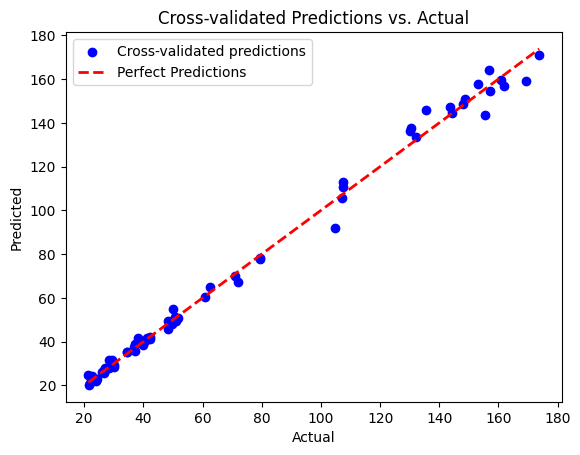

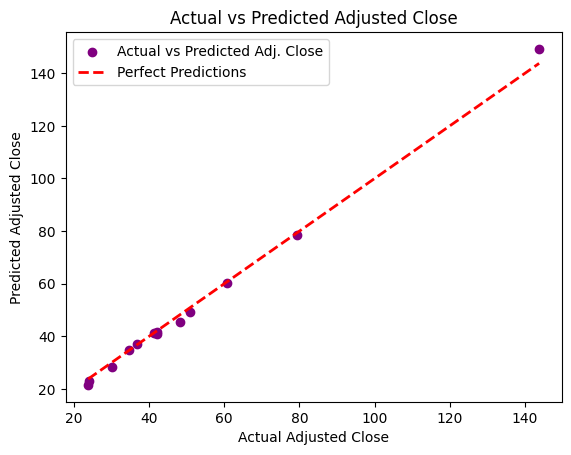

In [5]:
df_aapl = pd.read_csv('AAPL.csv')

# Assign the target adjusted close (ie what we are trying to predict)
# to be the next day's adjusted close
df_aapl['Target Adj Close'] = df_aapl['Adj Close'].shift(-1)

# Drop the last row to handle NaN values created by the shift
df_aapl = df_aapl.dropna()

# Initialize an empty dataframe to store the selected rows (earnings rows and the subsequent row directly after
# so we can see the effect of the earnings results on the stock price the next day)
selected_rows = pd.DataFrame()

# Iterate through the entirety of the aapl dataframe
for index, row in df_aapl.iterrows():
    # Check if the current row has "Earnings" equal to 1
    if row['Earnings'] == 1.0:
        # Append the current row
        selected_rows = selected_rows.append(row)
        # Check if we are still within bounds of the df
        if ((index + 1 < len(df_aapl))):
          # If so, also append the subsequent non-earnings row to our selected rows
          selected_rows = selected_rows.append(df_aapl.loc[index + 1])

# Reset the index of the new DataFrame
selected_rows.reset_index(drop=True, inplace=True)

# Update the aapl df to contain only the selected rows relevant to earnings eve
df_aapl_earn = selected_rows

# Separate the features (X) and target variable (y)
y_aapl = df_aapl_earn['Target Adj Close']

X_aapl = df_aapl_earn.drop(['Adj Close', 'Target Adj Close', 'Date'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_aapl, y_aapl, test_size=0.2)

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
linear_regression_model = LinearRegression()

# Perform cross-validated predictions
predicted = cross_val_predict(linear_regression_model, X_aapl, y_aapl, cv=10)

# Train the regression model on the scaled training data
linear_regression_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
predictions = linear_regression_model.predict(X_test_scaled)

# Create a DataFrame or list of tuples with predicted and actual values
results_df = pd.DataFrame({'Predicted': predictions, 'Actual': y_test})
# Zip the predictions and test values together for ease
results_tuples = list(zip(predictions, y_test))

print(f"Overall size of predictions for a day (earnings) out: {len(results_df)}")

# This accuracy represents how "off" the results are between our prediction for each row and the actual value
# of the adjusted close (using abs val)
Abs_accuracy = (1 - np.abs(1 - results_df['Predicted'] / results_df['Actual']))
print("Overall modified Accuracy")
print(np.mean(Abs_accuracy))

# Evaluate the performance of the regression model
mse = mean_squared_error(y_aapl, predicted)
print(f"Mean Squared Error (adj price in dollars amount off): {mse}")

# takes in open, high, low, close, volume, earnings, expected eps, actual eps
# below is an example value of earnings day eve provided as an example (11/01/2018)
custom_values = np.array([[54.762501,55.590000,54.202499,55.555000,233292800,1,0.7,0.73]])

# This would be the next day after the above date (11/02/2018)
actual_adj_value = 49.889595

# Scale the custom input values using a standard scaker
custom_values_scaled = scaler.transform(custom_values)

# Make predictions with the linear regression model
# for our custom values (test example 11/01/2018 predicting 11/02/2018 adj close)
custom_predictions = linear_regression_model.predict(custom_values_scaled)

# Print the predictions
print(f"Custom Prediction for next earnings day, actual adj close is {actual_adj_value}")
print(f"Linear Regression model predicted for next earnings day: {custom_predictions}")

print("Accuracy of Custom Prediction:")
print((1 - np.abs(1 - custom_predictions / actual_adj_value)) * 100)

# Plot the results of cross-validated predictions
plt.scatter(y_aapl, predicted, color='blue', label='Cross-validated predictions')
plt.plot([y_aapl.min(), y_aapl.max()], [y_aapl.min(), y_aapl.max()], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Cross-validated Predictions vs. Actual')
plt.legend()
plt.show()

# Plot the actual difference between the predicted and actual adjusted close
plt.scatter(results_df['Actual'], results_df['Predicted'], color='purple', label='Actual vs Predicted Adj. Close')

# Plot a diagonal line representing perfect predictions
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')

plt.xlabel('Actual Adjusted Close')
plt.ylabel('Predicted Adjusted Close')
plt.title('Actual vs Predicted Adjusted Close')
plt.legend()
plt.show()

**Analysis of earnings eve results**

Similar to the above non-earnings eve results, we can see that our linear regression model performs much more accurately when the actual adjusted close price is lower, and becomes more erratic as the share price increases, ie time goes on. Besides having much fewer data points to work with, earnings is particularly interesting as it is readily known that even if a company beats earnings estimates, the stock price can still decrease based on the whims of the market and other external factors, thus, achieving accuracy with the linear regression model for this application is difficult but intriguing. As in recent years past, with increased market volatility we can see this trend demonstrated yet again across both the cross-validated prediction and predicted adjusted close vs actual.

**Next Month Stock Prediction (non-earnings)**

Note that the shift for the monthly data is not quite as linear as simply shifting over by 1 for the subsequent day due to varying month length. Instead, an average has been taken between different months to use an approximation of the number of market open days that elaspses in a monthly interval. An approximation of 22 market open days between monthly intervals was found to best estimate this shift.


Overall size of predictions for a month out: 644
Overall modified Accuracy
0.9221081930707073
Mean Squared Error (adj price in dollars amount off): 39.06946178069325
Custom Prediction for next month, actual adj close is 131.159927
Linear Regression model predicted for next month: [147.94834539]
Accuracy of Custom Prediction:
[87.20003985]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


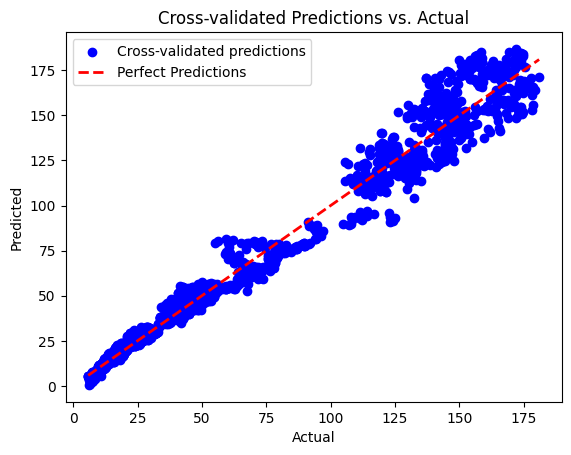

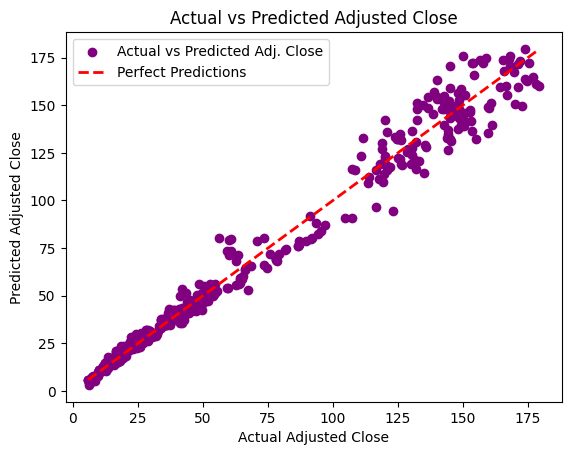

In [6]:
# Reset the df back to pre-shift to prepare for the monthly shift
df_aapl = pd.read_csv('AAPL.csv')

# Assign the target adj close (what we are trying to predict)
# to be the adjusted close of the row approximately 22 business (market open) days later to simulate a month
df_aapl['Target Adj Close'] = df_aapl['Adj Close'].shift(-22)

# Drop the last row to handle NaN values created by the shift
df_aapl = df_aapl.dropna()

# Only keep the  non-earnings rows (ie where Earnings != 1)
df_aapl_non = df_aapl[df_aapl['Earnings'] != 1]

# Separate the features (X) and target variable (y) which is the target adjusted close
# see report / text comments for further explanation
y_aapl = df_aapl_non['Target Adj Close']

# Note that we drop the expected EPS and acutal EPS since this is for a non-earnings day sequence, which means that EPS data is not relevant
# since we are not considered earnings per share (EPS) estimates
X_aapl = df_aapl_non.drop(['Adj Close', 'Target Adj Close', 'Date', 'Estimated EPS', 'Actual EPS'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_aapl, y_aapl, test_size=0.2)

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
linear_regression_model = LinearRegression()

# Perform cross-validated predictions
predicted = cross_val_predict(linear_regression_model, X_aapl, y_aapl, cv=10)

# Train the regression model on the scaled training data
linear_regression_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
predictions = linear_regression_model.predict(X_test_scaled)

# Create a DataFrame with cross-validated predictions
results_df = pd.DataFrame({'Predicted': predictions, 'Actual': y_test})
# Zip the predictions and test values together for ease
results_tuples = list(zip(predictions, y_test))

print(f"Overall size of predictions for a month out: {len(results_df)}")

# This accuracy represents how "off" the results are between our prediction for each row and the actual value
# of the adjusted close (using abs val)
Abs_accuracy = (1 - np.abs(1 - results_df['Predicted'] / results_df['Actual']))
print("Overall modified Accuracy")
print(np.mean(Abs_accuracy))

# Evaluate the performance of the regression model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (adj price in dollars amount off): {mse}")

# Takes in open, high, low, close, volume, earnings (0 for non earnings tomorrow 1 for earnings tomorrow)
# below is an example value of a non-earnings day sequence provided as an example (2022-05-17)
custom_values = np.array([[148.860001,149.770004,146.679993,149.240005,78336300,0]])

# This would be the date (2022-06-17)
actual_adj_value = 131.159927

# Scale the custom input values using a standard scaker
custom_values_scaled = scaler.transform(custom_values)

# Make predictions with the linear regression model
# for our custom values (test example (2022-05-17) predicting (2022-06-17)
custom_predictions = linear_regression_model.predict(custom_values_scaled)

# Print the predictions
print(f"Custom Prediction for next month, actual adj close is {actual_adj_value}")
print(f"Linear Regression model predicted for next month: {custom_predictions}")

print("Accuracy of Custom Prediction:")
print((1 - np.abs(1 - custom_predictions / actual_adj_value)) * 100)

# Plot the results of cross-validated predictions
plt.scatter(y_aapl, predicted, color='blue', label='Cross-validated predictions')
plt.plot([y_aapl.min(), y_aapl.max()], [y_aapl.min(), y_aapl.max()], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Cross-validated Predictions vs. Actual')
plt.legend()
plt.show()

# Plot the actual difference between the predicted and actual adjusted close
plt.scatter(results_df['Actual'], results_df['Predicted'], color='purple', label='Actual vs Predicted Adj. Close')

# Plot a diagonal line representing perfect predictions
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')

plt.xlabel('Actual Adjusted Close')
plt.ylabel('Predicted Adjusted Close')
plt.title('Actual vs Predicted Adjusted Close')
plt.legend()
plt.show()


**Next Year Stock Prediction (non-earnings)**

To determine the 250 value as the proper amount to shift, I used the .tail() method to see the last values of the df, and adjusted the amount so that the tail end of the data cut off as close to 1 year earlier as possible, ensuring the closest possible business day shift for the dataset. Also manual testing was performed in Excel to ensure 250 provided a realistic shift to simulate a year.

Overall size of predictions for a year out: 599
Overall modified Accuracy
0.7581711030386689
Mean Squared Error (adj price in dollars amount off): 255.14733964251295
Custom Prediction for next year, actual adj close is 51.923771
Linear Regression model predicted for next year: [212.38088215]
Accuracy of Custom Prediction:
[-209.02437951]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


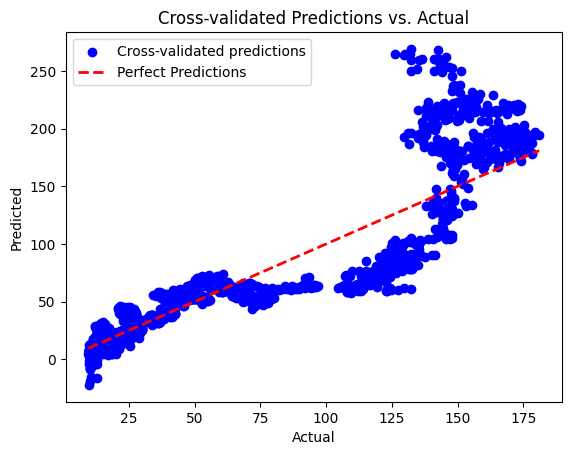

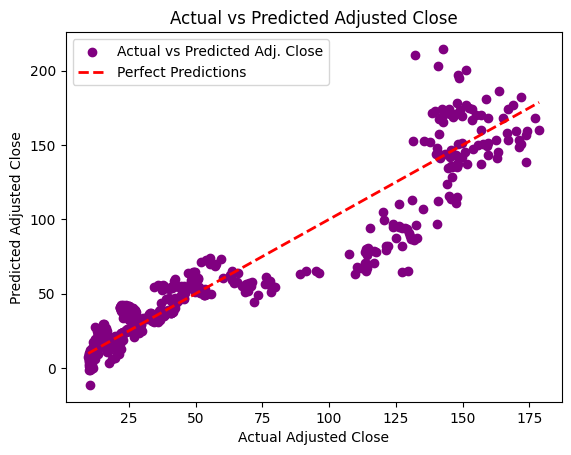

In [7]:
# Reset the df back to pre-shift to prepare for the monthly shift
df_aapl = pd.read_csv('AAPL.csv')

# Assign the target adj close (what we are trying to predict)
# to be the adjusted close of the row approximately one year (250 business market open) days later
df_aapl['Target Adj Close'] = df_aapl['Adj Close'].shift(-250)

# Drop the last row to handle NaN values created by the shift
df_aapl = df_aapl.dropna()

# Only keep the  non-earnings rows (ie where Earnings != 1)
df_aapl_non = df_aapl[df_aapl['Earnings'] != 1]

# Separate the features (X) and target variable (y) which is the target adjusted close
# see report / text comments for further explanation
y_aapl = df_aapl_non['Target Adj Close']

# Note that we drop the expected EPS and acutal EPS since this is for a non-earnings day sequence, which means that EPS data is not relevant
# since we are not considered earnings per share (EPS) estimates
X_aapl = df_aapl_non.drop(['Adj Close', 'Target Adj Close', 'Date', 'Estimated EPS', 'Actual EPS'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_aapl, y_aapl, test_size=0.2)

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
linear_regression_model = LinearRegression()

# Perform cross-validated predictions
predicted = cross_val_predict(linear_regression_model, X_aapl, y_aapl, cv=10)

# Train the regression model on the scaled training data
linear_regression_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
predictions = linear_regression_model.predict(X_test_scaled)

# Create a DataFrame with cross-validated predictions
results_df = pd.DataFrame({'Predicted': predictions, 'Actual': y_test})
# Zip the predictions and test values together for ease
results_tuples = list(zip(predictions, y_test))

print(f"Overall size of predictions for a year out: {len(results_df)}")

# This accuracy represents how "off" the results are between our prediction for each row and the actual value
# of the adjusted close (using abs val)
Abs_accuracy = (1 - np.abs(1 - results_df['Predicted'] / results_df['Actual']))
print("Overall modified Accuracy")
print(np.mean(Abs_accuracy))

# Evaluate the performance of the regression model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (adj price in dollars amount off): {mse}")

# Takes in open, high, low, close, volume, earnings (0 for non earnings tomorrow 1 for earnings tomorrow)
# below is an example value of a non-earnings day sequence provided as an example (2018-08-21)
# custom_values = np.array([[54.200001,54.297501,53.507500,53.759998,104639200,0]])

custom_values = np.array([[181.27,183.89,180.97,183.79,54274900,0]])

# This would be the adj close at date 2019-08-21
actual_adj_value = 51.923771

# Scale the custom input values using a standard scaker
custom_values_scaled = scaler.transform(custom_values)

# Make predictions with the linear regression model
# for our custom values (test example 2018-08-21 predicting 2019-08-21)
custom_predictions = linear_regression_model.predict(custom_values_scaled)

# Print the predictions
print(f"Custom Prediction for next year, actual adj close is {actual_adj_value}")
print(f"Linear Regression model predicted for next year: {custom_predictions}")

print("Accuracy of Custom Prediction:")
print((1 - np.abs(1 - custom_predictions / actual_adj_value)) * 100)

# Plot the results of cross-validated predictions
plt.scatter(y_aapl, predicted, color='blue', label='Cross-validated predictions')
plt.plot([y_aapl.min(), y_aapl.max()], [y_aapl.min(), y_aapl.max()], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Cross-validated Predictions vs. Actual')
plt.legend()
plt.show()

# Plot the actual difference between the predicted and actual adjusted close
plt.scatter(results_df['Actual'], results_df['Predicted'], color='purple', label='Actual vs Predicted Adj. Close')

# Plot a diagonal line representing perfect predictions
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')

plt.xlabel('Actual Adjusted Close')
plt.ylabel('Predicted Adjusted Close')
plt.title('Actual vs Predicted Adjusted Close')
plt.legend()
plt.show()


**Next Decade Stock Prediction (non-earnings)**

The 2520 value as the approximation for business days in a decade was found to be most suitable for this dataset using a similar method as the yearly shift estimate in the above cell.

In [60]:
# Reset the df back to pre-shift to prepare for the monthly shift
df_aapl = pd.read_csv('AAPL.csv')

df_aapl = df_aapl.dropna(subset=['Date'])

# Convert the 'Date' column to datetime type
# df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])

# # Extract the timestamp from the datetime and convert it to float
# df_aapl['Date'] = df_aapl['Date'].apply(lambda x: x.timestamp())

# Assign the target adj close (what we are trying to predict)
# to be the adjusted close of the row approximately 2520 business (market open) days later to simulate a decade later
df_aapl['Target Adj Close'] = df_aapl['Adj Close'].shift(-2520)

# Drop the last row to handle NaN values created by the shift
df_aapl = df_aapl.dropna()

# Only keep the  non-earnings rows (ie where Earnings != 1)
df_aapl_non = df_aapl[df_aapl['Earnings'] != 1]

# Separate the features (X) and target variable (y) which is the target adjusted close
# see report / text comments for further explanation
y_aapl = df_aapl_non['Target Adj Close']

# Note that we drop the expected EPS and acutal EPS since this is for a non-earnings day sequence, which means that EPS data is not relevant
# since we are not considered earnings per share (EPS) estimates
X_aapl = df_aapl_non.drop(['Adj Close', 'Target Adj Close', 'Date', 'Estimated EPS', 'Actual EPS'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_aapl, y_aapl, test_size=0.2)

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
linear_regression_model = LinearRegression()

# Perform cross-validated predictions
predicted = cross_val_predict(linear_regression_model, X_aapl, y_aapl, cv=10)

# Train the regression model on the scaled training data
linear_regression_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
predictions = linear_regression_model.predict(X_test_scaled)

df_aapl_total = pd.read_csv('AAPL.csv')

df_aapl_total = df_aapl_total.dropna(subset=['Date'])

X_aapl_total = df_aapl_total.drop(['Adj Close', 'Date', 'Estimated EPS', 'Actual EPS'], axis=1)

# Create a new value for all predictions
X_total_scaled = scaler.transform(X_aapl_total)

print(f"Len of X_aapl: {len(X_aapl_total)}")
print(f"Len of X_aapl_scaled: {len(X_total_scaled)}")

# Create a DataFrame with cross-validated predictions
results_df = pd.DataFrame({'Predicted': predictions, 'Actual': y_test})
# Zip the predictions and test values together for ease
results_tuples = list(zip(predictions, y_test))

predictions_total = linear_regression_model.predict(X_total_scaled)
results_total_df_lr = pd.DataFrame({'Predicted': predictions_total})


# print("incoming results for looop")
# for i in range(len(predictions_total)):
#   print(predictions_total[i])

print(f"Overall size of predictions for a decade out: {len(results_df)}")

# This accuracy represents how "off" the results are between our prediction for each row and the actual value
# of the adjusted close (using abs val)
Abs_accuracy = (1 - np.abs(1 - results_df['Predicted'] / results_df['Actual']))
print("Overall modified Accuracy")
print(np.mean(Abs_accuracy))

# Evaluate the performance of the regression model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (adj price in dollars amount off): {mse}")

# Takes in open, high, low, close, volume, earnings (0 for non earnings tomorrow 1 for earnings tomorrow)
# below is an example value of a non-earnings day sequence provided as an example (2012-02-14)
# custom_values = np.array([[18.023571,18.198570,17.928572,18.195000,460398400,0]])

custom_values = np.array([[66.945000,68.139999,66.830002,67.864998,137310400,0]])


# This would be the date (2022-02-14)
actual_adj_value = 168.119446

# Scale the custom input values using a standard scaker
custom_values_scaled = scaler.transform(custom_values)

# Make predictions with the linear regression model
# for our custom values (test example 2012-02-14 predicting 2022-02-14
custom_predictions = linear_regression_model.predict(custom_values_scaled)

# Print the predictions
print(f"Custom Prediction for next decade, actual adj close is {actual_adj_value}")
print(f"Linear Regression model predicted for next decade: {custom_predictions}")

print("Accuracy of Custom Prediction:")
print((1 - np.abs(1 - custom_predictions / actual_adj_value)) * 100)

# Plot the results of cross-validated predictions
# plt.scatter(y_aapl, predicted, color='blue', label='Cross-validated predictions')
# plt.plot([y_aapl.min(), y_aapl.max()], [y_aapl.min(), y_aapl.max()], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Cross-validated Predictions vs. Actual')
# plt.legend()
# plt.show()

# # Plot the actual difference between the predicted and actual adjusted close
# plt.scatter(results_total_df['Actual'], results_total_df['Predicted'], color='purple', label='Actual vs Predicted Adj. Close')

# # Plot a diagonal line representing perfect predictions
# plt.plot([results_total_df['Actual'].min(), results_total_df['Actual'].max()], [results_total_df['Actual'].min(), results_total_df['Actual'].max()], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')

# plt.xlabel('Actual Adjusted Close')
# plt.ylabel('Predicted Adjusted Close')
# plt.title('Actual vs Predicted Adjusted Close')
# plt.legend()
# plt.show()


Len of X_aapl: 3271
Len of X_aapl_scaled: 3271
Overall size of predictions for a decade out: 151
Overall modified Accuracy
0.8477441996016458
Mean Squared Error (adj price in dollars amount off): 430.37357559329786
Custom Prediction for next decade, actual adj close is 168.119446
Linear Regression model predicted for next decade: [383.07350388]
Accuracy of Custom Prediction:
[-27.85793851]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Python print to Excel file converter

In [54]:
space_delimited_data = """
"""

# Split the data by space and create a list of numbers
numbers = space_delimited_data.split()

# Create a DataFrame with a single column
df = pd.DataFrame({'Numbers': numbers})

# Export the DataFrame to Excel
df.to_excel('/usr/output_aapl_pred4.xlsx', index=False)

# Random Forest Regressor

**Next Day Prediction (non-earnings eve)**

Uses non-earnings eve rows (ie rows where the next day is not an earnings day) to forecast AAPL stock price predictions for the next day

MSE of RF Regressor (adj price in dollars amount off): 1.728839291887357
1.728839291887357
Overall size of predictions for a day (non-earnings) out: 648
Overall modified Accuracy
0.9836265814644548
Custom Prediction for next day, actual adj close is 51.719452
Random Forest model predicted for next day: [53.03796242]
Accuracy of Custom Prediction:
[97.4506489]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


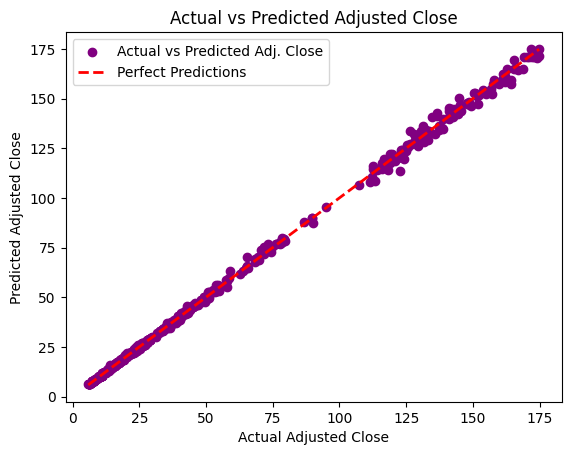

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Reset the df back to pre-shift to prepare for the monthly shift
df_aapl = pd.read_csv('AAPL.csv')

# Assign the target adj close (what we are trying to predict)
# to be the subsequent row's adjusted close on the following day
df_aapl['Target Adj Close'] = df_aapl['Adj Close'].shift(-1)

# Drop the last row to handle NaN values created by the shift
df_aapl = df_aapl.dropna()

# Only keep the  non-earnings rows (ie where Earnings != 1)
df_aapl_non = df_aapl[df_aapl['Earnings'] != 1]

# Separate the features (X) and target variable (y) which is the target adjusted close
# see report / text comments for further explanation
y_aapl = df_aapl_non['Target Adj Close']

# Note that we drop the expected EPS and acutal EPS since this is for a non-earnings day sequence, which means that EPS data is not relevant
# since we are not considered earnings per share (EPS) estimates
X_aapl = df_aapl_non.drop(['Adj Close', 'Target Adj Close', 'Date', 'Estimated EPS', 'Actual EPS'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_aapl, y_aapl, test_size=0.2)

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 10],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best hyperparameters based on our Grid search exhaustive findings
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Evaluate the performance of the best model
mse = mean_squared_error(y_test, predictions)
print(f"MSE of RF Regressor (adj price in dollars amount off): {mse}")
print(mse)

# Create a DataFrame with cross-validated predictions
results_df = pd.DataFrame({'Predicted': predictions, 'Actual': y_test})
# Zip the predictions and test values together for ease
results_tuples = list(zip(predictions, y_test))

print(f"Overall size of predictions for a day (non-earnings) out: {len(results_df)}")

# This accuracy represents how "off" the results are between our prediction for each row and the actual value
# of the adjusted close (using abs val)
Abs_accuracy = (1 - np.abs(1 - results_df['Predicted'] / results_df['Actual']))
print("Overall modified Accuracy")
print(np.mean(Abs_accuracy))


# Takes in open, high, low, close, volume, earnings (0 for non earnings tomorrow 1 for earnings tomorrow)
# below is an example value of a non-earnings day sequence provided as an example (10/23/2018)
custom_values = np.array([[53.957500,55.812500,53.674999,55.682499,155071200,0]])

# This would be the next day after the above date (10/24/2018)
actual_adj_value = 51.719452

# Scale the custom input values using a standard scaker
custom_values_scaled = scaler.transform(custom_values)

# Make predictions with the Random Forest model
# for our custom values (test example 10/23/2018 predicting 10/24/2018)
custom_predictions = best_model.predict(custom_values_scaled)

# Print the predictions
print(f"Custom Prediction for next day, actual adj close is {actual_adj_value}")
print(f"Random Forest model predicted for next day: {custom_predictions}")


print("Accuracy of Custom Prediction:")
print((1 - np.abs(1 - custom_predictions / actual_adj_value)) * 100)

# Plot the actual difference between the predicted and actual adjusted close
plt.scatter(results_df['Actual'], results_df['Predicted'], color='purple', label='Actual vs Predicted Adj. Close')

# Plot a diagonal line representing perfect predictions
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')

plt.xlabel('Actual Adjusted Close')
plt.ylabel('Predicted Adjusted Close')
plt.title('Actual vs Predicted Adjusted Close')
plt.legend()
plt.show()


**Next Day Prediction (earnings eve)**
Uses earnings eve rows and subsequent earnings day rows as pairs to predict the earnings day adjusted price based upon earnings eve

<ipython-input-11-51ae7c83829a>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_rows = selected_rows.append(row)
<ipython-input-11-51ae7c83829a>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_rows = selected_rows.append(df_aapl.loc[index + 1])
<ipython-input-11-51ae7c83829a>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_rows = selected_rows.append(row)
<ipython-input-11-51ae7c83829a>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_rows = selected_rows.append(df_aapl.loc[index + 1])
<ipython-input-11-51ae7c83829a>:19: FutureWarning: The frame.append method is deprecated and will be removed f

MSE of RF Regressor (adj price in dollars amount off): 90.09436196092058
90.09436196092058
Overall size of predictions for a day out (earnings) out: 13
Overall modified Accuracy
0.9500116323193825
Accuracy of Custom Prediction:
[99.0096192]
Custom Prediction for next day (earnings), actual adj close is 49.889595
Random Forest model predicted for next day (earnings): [50.38369197]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


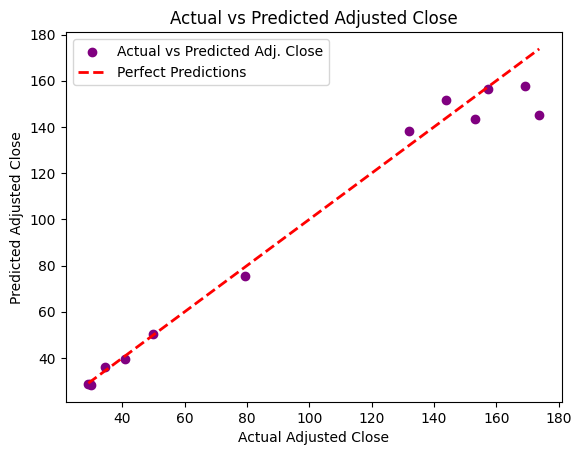

In [11]:
df_aapl = pd.read_csv('AAPL.csv')

# Assign the target adjusted close (ie what we are trying to predict)
# to be the next day's adjusted close
df_aapl['Target Adj Close'] = df_aapl['Adj Close'].shift(-1)

# Drop the last row to handle NaN values created by the shift
df_aapl = df_aapl.dropna()

# Initialize an empty dataframe to store the selected rows (earnings rows and the subsequent row directly after
# so we can see the effect of the earnings results on the stock price the next day)
selected_rows = pd.DataFrame()

# Iterate through the entirety of the aapl dataframe
for index, row in df_aapl.iterrows():
    # Check if the current row has "Earnings" equal to 1
    if row['Earnings'] == 1.0:
        # Append the current row
        selected_rows = selected_rows.append(row)
        # Check if we are still within bounds of the df
        if ((index + 1 < len(df_aapl))):
          # If so, also append the subsequent non-earnings row to our selected rows
          selected_rows = selected_rows.append(df_aapl.loc[index + 1])

# Reset the index of the new DataFrame
selected_rows.reset_index(drop=True, inplace=True)

# Update the aapl df to contain only the selected rows relevant to earnings eve
df_aapl_earn = selected_rows

# Separate the features (X) and target variable (y)
y_aapl = df_aapl_earn['Target Adj Close']

X_aapl = df_aapl_earn.drop(['Adj Close', 'Target Adj Close', 'Date'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_aapl, y_aapl, test_size=0.2)

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 10],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best hyperparameters based on our Grid search exhaustive findings
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Evaluate the performance of the best model
mse = mean_squared_error(y_test, predictions)
print(f"MSE of RF Regressor (adj price in dollars amount off): {mse}")
print(mse)

# Create a DataFrame with cross-validated predictions
results_df = pd.DataFrame({'Predicted': predictions, 'Actual': y_test})
# Zip the predictions and test values together for ease
results_tuples = list(zip(predictions, y_test))


print(f"Overall size of predictions for a day out (earnings) out: {len(results_df)}")

# This accuracy represents how "off" the results are between our prediction for each row and the actual value
# of the adjusted close (using abs val)
Abs_accuracy = (1 - np.abs(1 - results_df['Predicted'] / results_df['Actual']))
print("Overall modified Accuracy")
print(np.mean(Abs_accuracy))


# takes in open, high, low, close, volume, earnings, expected eps, actual eps
# below is an example value of earnings day eve provided as an example (11/01/2018)
custom_values = np.array([[54.762501,55.590000,54.202499,55.555000,233292800,1,0.7,0.73]])

# This would be the next day after the above date (11/02/2018)
actual_adj_value = 49.889595

# Scale the custom input values using a standard scaker
custom_values_scaled = scaler.transform(custom_values)

# Make predictions with the Random Forest model
# for our custom values (test example 11/01/2018 predicting 11/02/2018 adj close)
custom_predictions = best_model.predict(custom_values_scaled)

# Print the predictions
print("Accuracy of Custom Prediction:")
print((1 - np.abs(1 - custom_predictions / actual_adj_value)) * 100)

print(f"Custom Prediction for next day (earnings), actual adj close is {actual_adj_value}")
print(f"Random Forest model predicted for next day (earnings): {custom_predictions}")

# Plot the actual difference between the predicted and actual adjusted close
plt.scatter(results_df['Actual'], results_df['Predicted'], color='purple', label='Actual vs Predicted Adj. Close')

# Plot a diagonal line representing perfect predictions
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')

plt.xlabel('Actual Adjusted Close')
plt.ylabel('Predicted Adjusted Close')
plt.title('Actual vs Predicted Adjusted Close')
plt.legend()
plt.show()

**Next Month Prediction**

MSE of RF Regressor (adj price in dollars amount off): 28.65296228501822
28.65296228501822
Overall size of predictions for a month out: 644
Overall modified Accuracy
0.9416509287927118
Custom Prediction for next month, actual adj close is 131.159927
Random Forest model predicted for next month: [145.22221745]
Accuracy of Custom Prediction:
[89.2785161]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


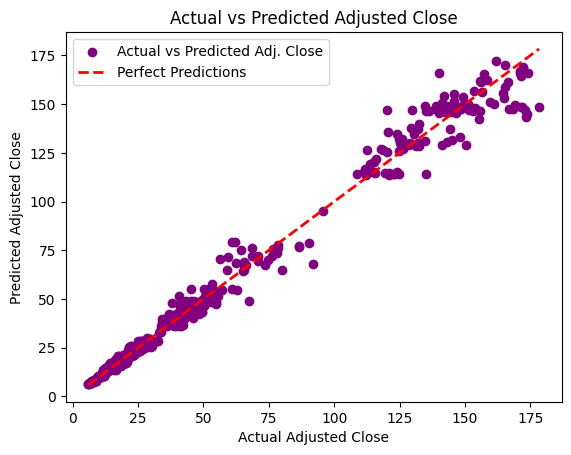

In [12]:
# Reset the df back to pre-shift to prepare for the monthly shift
df_aapl = pd.read_csv('AAPL.csv')

# Assign the target adj close (what we are trying to predict)
# to be the adjusted close of the row approximately 22 business (market open) days later to simulate a month later
df_aapl['Target Adj Close'] = df_aapl['Adj Close'].shift(-22)

# Drop the last row to handle NaN values created by the shift
df_aapl = df_aapl.dropna()

# Only keep the  non-earnings rows (ie where Earnings != 1)
df_aapl_non = df_aapl[df_aapl['Earnings'] != 1]

# Separate the features (X) and target variable (y) which is the target adjusted close
# see report / text comments for further explanation
y_aapl = df_aapl_non['Target Adj Close']

# Note that we drop the expected EPS and acutal EPS since this is for a non-earnings day sequence, which means that EPS data is not relevant
# since we are not considered earnings per share (EPS) estimates
X_aapl = df_aapl_non.drop(['Adj Close', 'Target Adj Close', 'Date', 'Estimated EPS', 'Actual EPS'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_aapl, y_aapl, test_size=0.2)

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 10],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best hyperparameters based on our Grid search exhaustive findings
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Evaluate the performance of the best model
mse = mean_squared_error(y_test, predictions)
print(f"MSE of RF Regressor (adj price in dollars amount off): {mse}")
print(mse)

# Create a DataFrame with cross-validated predictions
results_df = pd.DataFrame({'Predicted': predictions, 'Actual': y_test})
# Zip the predictions and test values together for ease
results_tuples = list(zip(predictions, y_test))

print(f"Overall size of predictions for a month out: {len(results_df)}")

# This accuracy represents how "off" the results are between our prediction for each row and the actual value
# of the adjusted close (using abs val)
Abs_accuracy = (1 - np.abs(1 - results_df['Predicted'] / results_df['Actual']))
print("Overall modified Accuracy")
print(np.mean(Abs_accuracy))

# Takes in open, high, low, close, volume, earnings (0 for non earnings tomorrow 1 for earnings tomorrow)
# below is an example value of a non-earnings day sequence provided as an example (2022-05-17)
custom_values = np.array([[148.860001,149.770004,146.679993,149.240005,78336300,0]])

# This would be the date (2022-06-17)
actual_adj_value = 131.159927

# Scale the custom input values using a standard scaker
custom_values_scaled = scaler.transform(custom_values)

# Make predictions with the random forest regression model
# for our custom values (test example 2022-05-17 predicting 2022-06-17)
custom_predictions = best_model.predict(custom_values_scaled)

# Print the predictions
print(f"Custom Prediction for next month, actual adj close is {actual_adj_value}")
print(f"Random Forest model predicted for next month: {custom_predictions}")

print("Accuracy of Custom Prediction:")
print((1 - np.abs(1 - custom_predictions / actual_adj_value)) * 100)

# Plot the actual difference between the predicted and actual adjusted close
plt.scatter(results_df['Actual'], results_df['Predicted'], color='purple', label='Actual vs Predicted Adj. Close')

# Plot a diagonal line representing perfect predictions
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')

plt.xlabel('Actual Adjusted Close')
plt.ylabel('Predicted Adjusted Close')
plt.title('Actual vs Predicted Adjusted Close')
plt.legend()
plt.show()


**Next Year Prediction**

In [13]:
# Reset the df back to pre-shift to prepare for the monthly shift
df_aapl = pd.read_csv('AAPL.csv')

# Assign the target adj close (what we are trying to predict)
# to be the adjusted close of the row approximately 250 business (market open) days later to simulate a year later
df_aapl['Target Adj Close'] = df_aapl['Adj Close'].shift(-250)

# Drop the last row to handle NaN values created by the shift
df_aapl = df_aapl.dropna()

# Only keep the  non-earnings rows (ie where Earnings != 1)
df_aapl_non = df_aapl[df_aapl['Earnings'] != 1]

# Separate the features (X) and target variable (y) which is the target adjusted close
# see report / text comments for further explanation
y_aapl = df_aapl_non['Target Adj Close']

# Note that we drop the expected EPS and acutal EPS since this is for a non-earnings day sequence, which means that EPS data is not relevant
# since we are not considered earnings per share (EPS) estimates
X_aapl = df_aapl_non.drop(['Adj Close', 'Target Adj Close', 'Date', 'Estimated EPS', 'Actual EPS'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_aapl, y_aapl, test_size=0.2)

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 10],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best hyperparameters based on our Grid search exhaustive findings
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Evaluate the performance of the best model
mse = mean_squared_error(y_test, predictions)
print(f"MSE of RF Regressor (adj price in dollars amount off): {mse}")
print(mse)

# Create a DataFrame with cross-validated predictions
results_df = pd.DataFrame({'Predicted': predictions, 'Actual': y_test})
# Zip the predictions and test values together for ease
results_tuples = list(zip(predictions, y_test))

print(f"Overall size of predictions for a year out: {len(results_df)}")

# This accuracy represents how "off" the results are between our prediction for each row and the actual value
# of the adjusted close (using abs val)
Abs_accuracy = (1 - np.abs(1 - results_df['Predicted'] / results_df['Actual']))
print("Overall modified Accuracy")
print(np.mean(Abs_accuracy))

# Takes in open, high, low, close, volume, earnings (0 for non earnings tomorrow 1 for earnings tomorrow)
# below is an example value of a non-earnings day sequence provided as an example (2018-08-21)
custom_values = np.array([[54.200001,54.297501,53.507500,53.759998,104639200,0]])

# This would be the adj close at date 2019-08-21
actual_adj_value = 51.923771

# Scale the custom input values using a standard scaker
custom_values_scaled = scaler.transform(custom_values)

# Make predictions with the Random Forest model
# for our custom values (test example 2018-08-21 predicting 2019-08-21)
custom_predictions = best_model.predict(custom_values_scaled)

# Print the predictions
print(f"Custom Prediction for next year, actual adj close is {actual_adj_value}")
print(f"Random Forest model predicted for next year: {custom_predictions}")

print("Accuracy of Custom Prediction:")
print((1 - np.abs(1 - custom_predictions / actual_adj_value)) * 100)

# Plot the actual difference between the predicted and actual adjusted close
plt.scatter(results_df['Actual'], results_df['Predicted'], color='purple', label='Actual vs Predicted Adj. Close')

# Plot a diagonal line representing perfect predictions
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')

plt.xlabel('Actual Adjusted Close')
plt.ylabel('Predicted Adjusted Close')
plt.title('Actual vs Predicted Adjusted Close')
plt.legend()
plt.show()


KeyboardInterrupt: 

**Next Decade Prediction**

In [ ]:
# Reset the df back to pre-shift to prepare for the monthly shift
df_aapl = pd.read_csv('AAPL.csv')

# Assign the target adj close (what we are trying to predict)
# to be the adjusted close of the row approximately 2520 business (market open) days later to simulate a decade later
df_aapl['Target Adj Close'] = df_aapl['Adj Close'].shift(-2520)

# Drop the last row to handle NaN values created by the shift
df_aapl = df_aapl.dropna()

# # Only keep the  non-earnings rows (ie where Earnings != 1)
# df_aapl_non = df_aapl[df_aapl['Earnings'] != 1]

# Specify the date to split the data
split_date = '2012-06-01'

# Convert the date column to datetime format if needed
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])

# Create training and testing sets
train_set = df_aapl[df_aapl['Date'] < split_date]
print(f"What is train set: {train_set}")
test_set = df_aapl[df_aapl['Date'] >= split_date]
print(f"What is test set: {test_set}")

# Separate features (X) and target variable (y) for training and testing
y_train = train_set['Target Adj Close']
X_train = train_set.drop(['Adj Close', 'Target Adj Close', 'Date', 'Estimated EPS', 'Actual EPS'], axis=1)

y_test = test_set['Target Adj Close']
X_test = test_set.drop(['Adj Close', 'Target Adj Close', 'Date', 'Estimated EPS', 'Actual EPS'], axis=1)


print(f"y_test {y_test}")
print(f"X_test {X_test}")

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best hyperparameters based on our Grid search exhaustive findings
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Evaluate the performance of the best model
mse = mean_squared_error(y_test, predictions)
print(f"MSE of RF Regressor (adj price in dollars amount off): {mse}")
print(mse)

# Create a DataFrame with cross-validated predictions
results_df = pd.DataFrame({'Predicted': predictions, 'Actual': y_test})
# Zip the predictions and test values together for ease
results_tuples = list(zip(predictions, y_test))

print(f"Overall size of predictions for a decade out: {len(results_df)}")

# This accuracy represents how "off" the results are between our prediction for each row and the actual value
# of the adjusted close (using abs val)
Abs_accuracy = (1 - np.abs(1 - results_df['Predicted'] / results_df['Actual']))
print("Overall modified Accuracy")
print(np.mean(Abs_accuracy))


# Takes in open, high, low, close, volume, earnings (0 for non earnings tomorrow 1 for earnings tomorrow)
# below is an example value of a non-earnings day sequence provided as an example (2012-02-14)
# custom_values = np.array([[18.023571,18.198570,17.928572,18.195000,460398400,0]])

custom_values = np.array([[66.945000,68.139999,66.830002,67.864998,137310400,0]])

# This would be the date (2022-02-14)
actual_adj_value = 168.119446

# Scale the custom input values using a standard scaker
custom_values_scaled = scaler.transform(custom_values)

# Make predictions with the Random Forest model
# for our custom values (test example 2012-02-14 predicting 2022-02-14)
custom_predictions = best_model.predict(custom_values_scaled)

# Print the predictions
print(f"Custom Prediction for next decade, actual adj close is {actual_adj_value}")
print(f"Random Forest model predicted for next decade: {custom_predictions}")

print("Accuracy of Custom Prediction:")
print((1 - np.abs(1 - custom_predictions / actual_adj_value)) * 100)

# Plot the actual difference between the predicted and actual adjusted close
plt.scatter(results_df['Actual'], results_df['Predicted'], color='purple', label='Actual vs Predicted Adj. Close')

# Plot a diagonal line representing perfect predictions
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')

plt.xlabel('Actual Adjusted Close')
plt.ylabel('Predicted Adjusted Close')
plt.title('Actual vs Predicted Adjusted Close')
plt.legend()
plt.show()


# Long-Short Term Memory

In [ ]:
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Dropout

# Reset the df back to pre-shift to prepare for the monthly shift
df_aapl = pd.read_csv('AAPL.csv')

# Assign the target adj close (what we are trying to predict)
# to be the subsequent row's adjusted close on the following day
df_aapl['Target Adj Close'] = df_aapl['Adj Close'].shift(-1)

# Drop the last row to handle NaN values created by the shift
df_aapl = df_aapl.dropna()

# Only keep the non-earnings rows (ie where Earnings != 1)
df_aapl_non = df_aapl[df_aapl['Earnings'] != 1]

# Separate the features (X) and target variable (y) which is the target adjusted close
# see report / text comments for further explanation
y_aapl = df_aapl_non['Target Adj Close']

# Note that we drop the expected EPS and actual EPS since this is for a non-earnings day sequence, which means that EPS data is not relevant
# since we are not considering earnings per share (EPS) estimates
X_aapl = df_aapl_non.drop(['Adj Close', 'Target Adj Close', 'Date', 'Estimated EPS', 'Actual EPS'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_aapl, y_aapl, test_size=0.2)

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler
X_test_scaled = scaler.transform(X_test)

# Normalize the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Reshape input data to be 3D [samples, time steps, features]
time_steps = 30  # You can experiment with different time steps
X_train_reshaped = np.array([X_train_scaled[i:i+time_steps, :] for i in range(len(X_train_scaled)-time_steps+1)])
X_test_reshaped = np.array([X_test_scaled[i:i+time_steps, :] for i in range(len(X_test_scaled)-time_steps+1)])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, X_train_reshaped.shape[2])))
model.add(Dropout(0.2))  # Add dropout layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))  # Add dropout layer
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train_scaled, epochs=12, batch_size=128, validation_split=0.1, verbose=1)

# Make predictions
train_predict = scaler_y.inverse_transform(model.predict(X_train_reshaped))
test_predict = scaler_y.inverse_transform(model.predict(X_test_reshaped))

# Calculate root mean squared error
train_rmse = np.sqrt(mean_squared_error(y_train.values[time_steps:], train_predict[:len(y_train) - time_steps]))
test_rmse = np.sqrt(mean_squared_error(y_test.values[time_steps:], test_predict[:len(y_test) - time_steps]))

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')

# Combine the training and testing predictions with the original data
all_predictions = np.concatenate([train_predict, test_predict])
all_actuals = np.concatenate([y_train.values[time_steps:], y_test.values[time_steps:]])

# Plot the actual difference between the predicted and actual adjusted close for testing data
plt.scatter(y_test.values[time_steps:], test_predict[:len(y_test) - time_steps], color='purple', label='Actual vs Predicted Test')

# Plot a diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')

plt.xlabel('Actual Adjusted Close')
plt.ylabel('Predicted Adjusted Close')
plt.title('Actual vs Predicted Adjusted Close - LSTM Results')
plt.legend()
plt.show()

# Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Reset the df back to pre-shift to prepare for the monthly shift
df_aapl = pd.read_csv('AAPL.csv')

# Assign the target adj close (what we are trying to predict)
# to be the subsequent row's adjusted close on the following day
df_aapl['Target Adj Close'] = df_aapl['Adj Close'].shift(-2520)

# Drop the last row to handle NaN values created by the shift
df_aapl = df_aapl.dropna()

# Specify the date to split the data
split_date = '2012-06-01'

# Convert the date column to datetime format if needed
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])

# Create training and testing sets
train_set = df_aapl[df_aapl['Date'] < split_date]
print(f"What is train set: {train_set}")
test_set = df_aapl[df_aapl['Date'] >= split_date]
print(f"What is test set: {test_set}")

# Separate features (X) and target variable (y) for training and testing
y_train = train_set['Target Adj Close']
X_train = train_set.drop(['Adj Close', 'Target Adj Close', 'Date', 'Estimated EPS', 'Actual EPS'], axis=1)

y_test = test_set['Target Adj Close']
X_test = test_set.drop(['Adj Close', 'Target Adj Close', 'Date', 'Estimated EPS', 'Actual EPS'], axis=1)


# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler
X_test_scaled = scaler.transform(X_test)

# SVR model
svr = SVR()

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1],
              'kernel': ['linear', 'rbf', 'poly'],
              'epsilon': [0.1, 0.2, 0.5],
              'degree': [2, 3, 4]}

grid_search = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train SVR model with best hyperparameters
best_svr = SVR(**best_params)
best_svr.fit(X_train_scaled, y_train)

# Make predictions
predictions = best_svr.predict(X_test_scaled)

# Calculate root mean squared error
test_rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Evaluate the performance of the best model
mse = mean_squared_error(y_test, predictions)
print(f"MSE of RF Regressor (adj price in dollars amount off): {mse}")
print(mse)

# Create a DataFrame with cross-validated predictions
results_df = pd.DataFrame({'Predicted': predictions, 'Actual': y_test})
# Zip the predictions and test values together for ease
results_tuples = list(zip(predictions, y_test))

print(f"Overall size of predictions for a year out: {len(results_df)}")

# This accuracy represents how "off" the results are between our prediction for each row and the actual value
# of the adjusted close (using abs val)
Abs_accuracy = (1 - np.abs(1 - results_df['Predicted'] / results_df['Actual']))
print("Overall modified Accuracy")
print(np.mean(Abs_accuracy))

# Takes in open, high, low, close, volume, earnings (0 for non earnings tomorrow 1 for earnings tomorrow)
# below is an example value of a non-earnings day sequence provided as an example (2018-08-21)
custom_values = np.array([[139.899994,141.350006,138.220001,138.979996,77033700,0]])

# This would be the adj close at date 2019-08-21
actual_adj_value = 51.923771

# Scale the custom input values using a standard scaker
custom_values_scaled = scaler.transform(custom_values)

# Make predictions with the Random Forest model
# for our custom values (test example 2018-08-21 predicting 2019-08-21)
custom_predictions = best_svr.predict(custom_values_scaled)

# Print the predictions
print(f"Custom Prediction for next year, actual adj close is {actual_adj_value}")
print(f"SVR model predicted for next decade: {custom_predictions}")

print("Accuracy of Custom Prediction:")
print((1 - np.abs(1 - custom_predictions / actual_adj_value)) * 100)

# Plot the actual difference between the predicted and actual adjusted close
plt.scatter(results_df['Actual'], results_df['Predicted'], color='purple', label='Actual vs Predicted Adj. Close')

# Plot a diagonal line representing perfect predictions
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')

plt.xlabel('Actual Adjusted Close')
plt.ylabel('Predicted Adjusted Close')
plt.title('Actual vs Predicted Adjusted Close')
plt.legend()
plt.show()


# Test DNN

Epoch 1/200
11/19 [================>.............] - ETA: 0s - loss: 17306.0176 

19/19 [==============================] - 2s 5ms/step - loss: 16723.9121
Epoch 2/200
 1/19 [>.............................] - ETA: 0s - loss: 16285.8809

19/19 [==============================] - 0s 3ms/step - loss: 16701.5781
Epoch 3/200
18/19 [===========================>..] - ETA: 0s - loss: 16799.7324

19/19 [==============================] - 0s 4ms/step - loss: 16689.2871
Epoch 4/200
11/19 [================>.............] - ETA: 0s - loss: 16609.2266

19/19 [==============================] - 0s 5ms/step - loss: 16678.2617
Epoch 5/200
16/19 [========================>.....] - ETA: 0s - loss: 16810.9258

19/19 [==============================] - 0s 5ms/step - loss: 16667.3867
Epoch 6/200
15/19 [======================>.......] - ETA: 0s - loss: 16449.8906

19/19 [==============================] - 0s 7ms/step - loss: 16655.5059
Epoch 7/200
13/19 [===================>..........] - ETA: 0s - loss: 16509.8574

19/19 [==============================] - 0s 5ms/step - loss: 16642.5059
Epoch 8/200
 1/19 [>.............................] - ETA: 0s - loss: 14690.8223

19/19 [==============================] - 0s 3ms/step - loss: 16626.1836
Epoch 9/200
19/19 [==============================] - ETA: 0s - loss: 16604.0703

19/19 [==============================] - 0s 4ms/step - loss: 16604.0703
Epoch 10/200
 7/19 [==========>...................] - ETA: 0s - loss: 16891.6406

19/19 [==============================] - 0s 6ms/step - loss: 16573.4785
Epoch 11/200
18/19 [===========================>..] - ETA: 0s - loss: 16472.1094

19/19 [==============================] - 0s 4ms/step - loss: 16529.4434
Epoch 12/200
19/19 [==============================] - ETA: 0s - loss: 16465.9004

19/19 [==============================] - 0s 4ms/step - loss: 16465.9004
Epoch 13/200
18/19 [===========================>..] - ETA: 0s - loss: 16326.4170

19/19 [==============================] - 0s 4ms/step - loss: 16374.3604
Epoch 14/200
19/19 [==============================] - ETA: 0s - loss: 16242.4932

19/19 [==============================] - 0s 4ms/step - loss: 16242.4932
Epoch 15/200
16/19 [========================>.....] - ETA: 0s - loss: 16025.5908

19/19 [==============================] - 0s 6ms/step - loss: 16059.7236
Epoch 16/200
19/19 [==============================] - ETA: 0s - loss: 15813.4873

19/19 [==============================] - 0s 7ms/step - loss: 15813.4873
Epoch 17/200
13/19 [===================>..........] - ETA: 0s - loss: 15690.3320

19/19 [==============================] - 0s 6ms/step - loss: 15493.5244
Epoch 18/200
18/19 [===========================>..] - ETA: 0s - loss: 14988.6455

19/19 [==============================] - 0s 4ms/step - loss: 15093.0234
Epoch 19/200
10/19 [==============>...............] - ETA: 0s - loss: 14641.5000

19/19 [==============================] - 0s 6ms/step - loss: 14598.8701
Epoch 20/200
18/19 [===========================>..] - ETA: 0s - loss: 13984.8750

19/19 [==============================] - 0s 7ms/step - loss: 14004.5918
Epoch 21/200
18/19 [===========================>..] - ETA: 0s - loss: 13295.2188

19/19 [==============================] - 0s 7ms/step - loss: 13314.2295
Epoch 22/200
17/19 [=========================>....] - ETA: 0s - loss: 12548.1611

19/19 [==============================] - 0s 7ms/step - loss: 12541.4766
Epoch 23/200
17/19 [=========================>....] - ETA: 0s - loss: 11936.8750

19/19 [==============================] - 0s 4ms/step - loss: 11679.2998
Epoch 24/200
14/19 [=====================>........] - ETA: 0s - loss: 10900.4639

19/19 [==============================] - 0s 7ms/step - loss: 10758.6689
Epoch 25/200
 9/19 [=============>................] - ETA: 0s - loss: 10168.8770

19/19 [==============================] - 0s 5ms/step - loss: 9790.2432
Epoch 26/200
16/19 [========================>.....] - ETA: 0s - loss: 8737.1426

19/19 [==============================] - 0s 8ms/step - loss: 8829.6299
Epoch 27/200
17/19 [=========================>....] - ETA: 0s - loss: 7806.1533

19/19 [==============================] - 0s 16ms/step - loss: 7887.3735
Epoch 28/200
18/19 [===========================>..] - ETA: 0s - loss: 7005.1587

19/19 [==============================] - 0s 14ms/step - loss: 7006.8735
Epoch 29/200
14/19 [=====================>........] - ETA: 0s - loss: 6076.6396

19/19 [==============================] - 0s 12ms/step - loss: 6227.2036
Epoch 30/200
14/19 [=====================>........] - ETA: 0s - loss: 5718.4385

19/19 [==============================] - 0s 5ms/step - loss: 5552.6084
Epoch 31/200
17/19 [=========================>....] - ETA: 0s - loss: 4921.1001

19/19 [==============================] - 0s 10ms/step - loss: 4998.3721
Epoch 32/200
14/19 [=====================>........] - ETA: 0s - loss: 4780.0542

19/19 [==============================] - 0s 5ms/step - loss: 4564.9282
Epoch 33/200
18/19 [===========================>..] - ETA: 0s - loss: 4207.7090

19/19 [==============================] - 0s 4ms/step - loss: 4223.5430
Epoch 34/200
10/19 [==============>...............] - ETA: 0s - loss: 3995.7278

19/19 [==============================] - 0s 5ms/step - loss: 3962.9993
Epoch 35/200
19/19 [==============================] - ETA: 0s - loss: 3762.5193

19/19 [==============================] - 0s 3ms/step - loss: 3762.5193
Epoch 36/200
19/19 [==============================] - ETA: 0s - loss: 3594.9861

19/19 [==============================] - 0s 4ms/step - loss: 3594.9861
Epoch 37/200
19/19 [==============================] - ETA: 0s - loss: 3459.1201

19/19 [==============================] - 0s 4ms/step - loss: 3459.1201
Epoch 38/200
19/19 [==============================] - ETA: 0s - loss: 3330.7334

19/19 [==============================] - 0s 3ms/step - loss: 3330.7334
Epoch 39/200
18/19 [===========================>..] - ETA: 0s - loss: 3211.2651

19/19 [==============================] - 0s 4ms/step - loss: 3222.9514
Epoch 40/200
 1/19 [>.............................] - ETA: 0s - loss: 2791.3850

19/19 [==============================] - 0s 3ms/step - loss: 3120.2922
Epoch 41/200
19/19 [==============================] - ETA: 0s - loss: 3026.4373

19/19 [==============================] - 0s 4ms/step - loss: 3026.4373
Epoch 42/200
19/19 [==============================] - ETA: 0s - loss: 2939.5417

19/19 [==============================] - 0s 3ms/step - loss: 2939.5417
Epoch 43/200
17/19 [=========================>....] - ETA: 0s - loss: 2768.2720

19/19 [==============================] - 0s 4ms/step - loss: 2851.9951
Epoch 44/200
19/19 [==============================] - ETA: 0s - loss: 2773.4773

19/19 [==============================] - 0s 4ms/step - loss: 2773.4773
Epoch 45/200
 1/19 [>.............................] - ETA: 0s - loss: 3029.4453

19/19 [==============================] - 0s 3ms/step - loss: 2697.6443
Epoch 46/200
17/19 [=========================>....] - ETA: 0s - loss: 2592.7188

19/19 [==============================] - 0s 4ms/step - loss: 2625.0344
Epoch 47/200
17/19 [=========================>....] - ETA: 0s - loss: 2633.7683

19/19 [==============================] - 0s 4ms/step - loss: 2555.5601
Epoch 48/200
13/19 [===================>..........] - ETA: 0s - loss: 2491.3477

19/19 [==============================] - 0s 5ms/step - loss: 2484.8323
Epoch 49/200
14/19 [=====================>........] - ETA: 0s - loss: 2396.4563

19/19 [==============================] - 0s 5ms/step - loss: 2417.6208
Epoch 50/200
15/19 [======================>.......] - ETA: 0s - loss: 2290.0510

19/19 [==============================] - 0s 4ms/step - loss: 2353.3523
Epoch 51/200
14/19 [=====================>........] - ETA: 0s - loss: 2332.1433

19/19 [==============================] - 0s 4ms/step - loss: 2290.0286
Epoch 52/200
15/19 [======================>.......] - ETA: 0s - loss: 2265.0483

19/19 [==============================] - 0s 4ms/step - loss: 2228.8352
Epoch 53/200
16/19 [========================>.....] - ETA: 0s - loss: 2203.3184

19/19 [==============================] - 0s 4ms/step - loss: 2168.3301
Epoch 54/200
16/19 [========================>.....] - ETA: 0s - loss: 2016.7020

19/19 [==============================] - 0s 4ms/step - loss: 2108.5593
Epoch 55/200
14/19 [=====================>........] - ETA: 0s - loss: 2049.8813

19/19 [==============================] - 0s 5ms/step - loss: 2050.9133
Epoch 56/200
13/19 [===================>..........] - ETA: 0s - loss: 2004.9266

19/19 [==============================] - 0s 5ms/step - loss: 1993.9313
Epoch 57/200
16/19 [========================>.....] - ETA: 0s - loss: 1954.5339

19/19 [==============================] - 0s 4ms/step - loss: 1938.8610
Epoch 58/200
13/19 [===================>..........] - ETA: 0s - loss: 1887.6476

19/19 [==============================] - 0s 4ms/step - loss: 1879.4729
Epoch 59/200
16/19 [========================>.....] - ETA: 0s - loss: 1879.5699

19/19 [==============================] - 0s 4ms/step - loss: 1824.8473
Epoch 60/200
15/19 [======================>.......] - ETA: 0s - loss: 1754.9768

19/19 [==============================] - 0s 4ms/step - loss: 1768.2314
Epoch 61/200
18/19 [===========================>..] - ETA: 0s - loss: 1743.4374

19/19 [==============================] - 0s 4ms/step - loss: 1712.4457
Epoch 62/200
11/19 [================>.............] - ETA: 0s - loss: 1756.4980

19/19 [==============================] - 0s 5ms/step - loss: 1656.8142
Epoch 63/200
17/19 [=========================>....] - ETA: 0s - loss: 1617.7150

19/19 [==============================] - 0s 4ms/step - loss: 1601.5889
Epoch 64/200
18/19 [===========================>..] - ETA: 0s - loss: 1570.8876

19/19 [==============================] - 0s 3ms/step - loss: 1548.6216
Epoch 65/200
18/19 [===========================>..] - ETA: 0s - loss: 1453.8903

19/19 [==============================] - 0s 4ms/step - loss: 1491.2675
Epoch 66/200
13/19 [===================>..........] - ETA: 0s - loss: 1380.8840

19/19 [==============================] - 0s 6ms/step - loss: 1438.2229
Epoch 67/200
16/19 [========================>.....] - ETA: 0s - loss: 1358.4283

19/19 [==============================] - 0s 8ms/step - loss: 1382.1791
Epoch 68/200
17/19 [=========================>....] - ETA: 0s - loss: 1282.6179

19/19 [==============================] - 0s 8ms/step - loss: 1322.7479
Epoch 69/200
12/19 [=================>............] - ETA: 0s - loss: 1268.1703

19/19 [==============================] - 0s 5ms/step - loss: 1265.2274
Epoch 70/200
13/19 [===================>..........] - ETA: 0s - loss: 1176.4175

19/19 [==============================] - 0s 5ms/step - loss: 1204.9760
Epoch 71/200
16/19 [========================>.....] - ETA: 0s - loss: 1197.2705

19/19 [==============================] - 0s 5ms/step - loss: 1147.6614
Epoch 72/200
19/19 [==============================] - ETA: 0s - loss: 1091.1062

19/19 [==============================] - 0s 6ms/step - loss: 1091.1062
Epoch 73/200
16/19 [========================>.....] - ETA: 0s - loss: 1030.0405

19/19 [==============================] - 0s 7ms/step - loss: 1041.2112
Epoch 74/200
10/19 [==============>...............] - ETA: 0s - loss: 1047.4761

19/19 [==============================] - 0s 6ms/step - loss: 992.8196
Epoch 75/200
17/19 [=========================>....] - ETA: 0s - loss: 932.6489

19/19 [==============================] - 0s 7ms/step - loss: 946.9133
Epoch 76/200
 9/19 [=============>................] - ETA: 0s - loss: 910.4705 

19/19 [==============================] - 0s 6ms/step - loss: 904.6921
Epoch 77/200
10/19 [==============>...............] - ETA: 0s - loss: 790.0974

19/19 [==============================] - 0s 6ms/step - loss: 864.0399
Epoch 78/200
 7/19 [==========>...................] - ETA: 0s - loss: 824.0233

19/19 [==============================] - 0s 6ms/step - loss: 826.8748
Epoch 79/200
18/19 [===========================>..] - ETA: 0s - loss: 780.0759

19/19 [==============================] - 0s 7ms/step - loss: 788.1464
Epoch 80/200
12/19 [=================>............] - ETA: 0s - loss: 699.1264

19/19 [==============================] - 0s 6ms/step - loss: 753.4627
Epoch 81/200
16/19 [========================>.....] - ETA: 0s - loss: 726.5432

19/19 [==============================] - 0s 4ms/step - loss: 721.6727
Epoch 82/200
15/19 [======================>.......] - ETA: 0s - loss: 658.2303

19/19 [==============================] - 0s 4ms/step - loss: 689.6771
Epoch 83/200
17/19 [=========================>....] - ETA: 0s - loss: 657.7794

19/19 [==============================] - 0s 7ms/step - loss: 662.0107
Epoch 84/200
 8/19 [===========>..................] - ETA: 0s - loss: 638.8521

19/19 [==============================] - 0s 6ms/step - loss: 634.5744
Epoch 85/200
17/19 [=========================>....] - ETA: 0s - loss: 588.2811

19/19 [==============================] - 0s 4ms/step - loss: 608.6594
Epoch 86/200
11/19 [================>.............] - ETA: 0s - loss: 629.8963

19/19 [==============================] - 0s 6ms/step - loss: 585.3305
Epoch 87/200
17/19 [=========================>....] - ETA: 0s - loss: 567.1459

19/19 [==============================] - 0s 4ms/step - loss: 561.3886
Epoch 88/200
12/19 [=================>............] - ETA: 0s - loss: 573.0645

19/19 [==============================] - 0s 5ms/step - loss: 539.8609
Epoch 89/200
10/19 [==============>...............] - ETA: 0s - loss: 546.6318

19/19 [==============================] - 0s 6ms/step - loss: 518.8109
Epoch 90/200
19/19 [==============================] - ETA: 0s - loss: 498.2939

19/19 [==============================] - 0s 6ms/step - loss: 498.2939
Epoch 91/200
19/19 [==============================] - ETA: 0s - loss: 480.7898

19/19 [==============================] - 0s 7ms/step - loss: 480.7898
Epoch 92/200
11/19 [================>.............] - ETA: 0s - loss: 429.3588

19/19 [==============================] - 0s 6ms/step - loss: 461.6514
Epoch 93/200
19/19 [==============================] - ETA: 0s - loss: 445.7893

19/19 [==============================] - 0s 6ms/step - loss: 445.7893
Epoch 94/200
12/19 [=================>............] - ETA: 0s - loss: 431.6843

19/19 [==============================] - 0s 6ms/step - loss: 429.8624
Epoch 95/200
 9/19 [=============>................] - ETA: 0s - loss: 423.1698

19/19 [==============================] - 0s 6ms/step - loss: 415.8168
Epoch 96/200
12/19 [=================>............] - ETA: 0s - loss: 444.2542

19/19 [==============================] - 0s 5ms/step - loss: 403.7128
Epoch 97/200
19/19 [==============================] - ETA: 0s - loss: 391.3064

19/19 [==============================] - 0s 7ms/step - loss: 391.3064
Epoch 98/200
18/19 [===========================>..] - ETA: 0s - loss: 373.7548

19/19 [==============================] - 0s 7ms/step - loss: 381.2333
Epoch 99/200
10/19 [==============>...............] - ETA: 0s - loss: 362.8413

19/19 [==============================] - 0s 6ms/step - loss: 371.5241
Epoch 100/200
19/19 [==============================] - ETA: 0s - loss: 364.0373

19/19 [==============================] - 0s 6ms/step - loss: 364.0373
Epoch 101/200
19/19 [==============================] - ETA: 0s - loss: 356.0378

19/19 [==============================] - 0s 7ms/step - loss: 356.0378
Epoch 102/200
17/19 [=========================>....] - ETA: 0s - loss: 340.8277

19/19 [==============================] - 0s 4ms/step - loss: 350.1407
Epoch 103/200
10/19 [==============>...............] - ETA: 0s - loss: 345.9858

19/19 [==============================] - 0s 6ms/step - loss: 344.5622
Epoch 104/200
10/19 [==============>...............] - ETA: 0s - loss: 358.0923

19/19 [==============================] - 0s 6ms/step - loss: 339.6191
Epoch 105/200
 1/19 [>.............................] - ETA: 0s - loss: 248.0242

19/19 [==============================] - 0s 3ms/step - loss: 336.2641
Epoch 106/200
17/19 [=========================>....] - ETA: 0s - loss: 338.0811

19/19 [==============================] - 0s 4ms/step - loss: 332.3057
Epoch 107/200
18/19 [===========================>..] - ETA: 0s - loss: 328.2312

19/19 [==============================] - 0s 7ms/step - loss: 328.6135
Epoch 108/200
11/19 [================>.............] - ETA: 0s - loss: 302.2739

19/19 [==============================] - 0s 6ms/step - loss: 325.8922
Epoch 109/200
14/19 [=====================>........] - ETA: 0s - loss: 337.1500

19/19 [==============================] - 0s 4ms/step - loss: 322.8971
Epoch 110/200
 8/19 [===========>..................] - ETA: 0s - loss: 298.1783

19/19 [==============================] - 0s 5ms/step - loss: 321.0243
Epoch 111/200
 1/19 [>.............................] - ETA: 0s - loss: 466.9141

19/19 [==============================] - 0s 3ms/step - loss: 319.0389
Epoch 112/200
13/19 [===================>..........] - ETA: 0s - loss: 314.2888

19/19 [==============================] - 0s 4ms/step - loss: 316.4245
Epoch 113/200
19/19 [==============================] - ETA: 0s - loss: 314.9839

19/19 [==============================] - 0s 3ms/step - loss: 314.9839
Epoch 114/200
19/19 [==============================] - ETA: 0s - loss: 312.6620

19/19 [==============================] - 0s 3ms/step - loss: 312.6620
Epoch 115/200
19/19 [==============================] - ETA: 0s - loss: 312.0239

19/19 [==============================] - 0s 3ms/step - loss: 312.0239
Epoch 116/200
 1/19 [>.............................] - ETA: 0s - loss: 398.7759

19/19 [==============================] - 0s 3ms/step - loss: 310.9173
Epoch 117/200
16/19 [========================>.....] - ETA: 0s - loss: 305.6784

19/19 [==============================] - 0s 4ms/step - loss: 309.6155
Epoch 118/200
17/19 [=========================>....] - ETA: 0s - loss: 310.4026

19/19 [==============================] - 0s 4ms/step - loss: 308.8508
Epoch 119/200
18/19 [===========================>..] - ETA: 0s - loss: 307.1310

19/19 [==============================] - 0s 4ms/step - loss: 307.7221
Epoch 120/200
18/19 [===========================>..] - ETA: 0s - loss: 304.5329

19/19 [==============================] - 0s 4ms/step - loss: 307.9978
Epoch 121/200
18/19 [===========================>..] - ETA: 0s - loss: 307.1976

19/19 [==============================] - 0s 4ms/step - loss: 306.7072
Epoch 122/200
17/19 [=========================>....] - ETA: 0s - loss: 297.6097

19/19 [==============================] - 0s 4ms/step - loss: 306.1390
Epoch 123/200
18/19 [===========================>..] - ETA: 0s - loss: 308.1745

19/19 [==============================] - 0s 4ms/step - loss: 305.9194
Epoch 124/200
13/19 [===================>..........] - ETA: 0s - loss: 307.9129

19/19 [==============================] - 0s 4ms/step - loss: 304.4286
Epoch 125/200
14/19 [=====================>........] - ETA: 0s - loss: 290.5986

19/19 [==============================] - 0s 5ms/step - loss: 304.1426
Epoch 126/200
18/19 [===========================>..] - ETA: 0s - loss: 306.1449

19/19 [==============================] - 0s 4ms/step - loss: 303.7944
Epoch 127/200
18/19 [===========================>..] - ETA: 0s - loss: 307.7859

19/19 [==============================] - 0s 4ms/step - loss: 303.1018
Epoch 128/200
 1/19 [>.............................] - ETA: 0s - loss: 302.6660

19/19 [==============================] - 0s 3ms/step - loss: 302.8429
Epoch 129/200
 1/19 [>.............................] - ETA: 0s - loss: 427.1344

19/19 [==============================] - 0s 3ms/step - loss: 302.8051
Epoch 130/200
17/19 [=========================>....] - ETA: 0s - loss: 297.5075

19/19 [==============================] - 0s 3ms/step - loss: 302.7488
Epoch 131/200
18/19 [===========================>..] - ETA: 0s - loss: 303.5320

19/19 [==============================] - 0s 4ms/step - loss: 302.1876
Epoch 132/200
17/19 [=========================>....] - ETA: 0s - loss: 305.4106

19/19 [==============================] - 0s 4ms/step - loss: 302.3358
Epoch 133/200
19/19 [==============================] - ETA: 0s - loss: 300.9949

19/19 [==============================] - 0s 4ms/step - loss: 300.9949
Epoch 134/200
18/19 [===========================>..] - ETA: 0s - loss: 297.9328

19/19 [==============================] - 0s 4ms/step - loss: 300.7547
Epoch 135/200
 1/19 [>.............................] - ETA: 0s - loss: 262.8468

19/19 [==============================] - 0s 3ms/step - loss: 300.5784
Epoch 136/200
16/19 [========================>.....] - ETA: 0s - loss: 286.7377

19/19 [==============================] - 0s 4ms/step - loss: 300.5754
Epoch 137/200
17/19 [=========================>....] - ETA: 0s - loss: 304.8694

19/19 [==============================] - 0s 4ms/step - loss: 301.0413
Epoch 138/200
14/19 [=====================>........] - ETA: 0s - loss: 301.8628

19/19 [==============================] - 0s 4ms/step - loss: 299.9005
Epoch 139/200
18/19 [===========================>..] - ETA: 0s - loss: 307.2638

19/19 [==============================] - 0s 4ms/step - loss: 300.3079
Epoch 140/200
19/19 [==============================] - ETA: 0s - loss: 299.9020

19/19 [==============================] - 0s 4ms/step - loss: 299.9020
Epoch 141/200
19/19 [==============================] - ETA: 0s - loss: 299.6348

19/19 [==============================] - 0s 4ms/step - loss: 299.6348
Epoch 142/200
19/19 [==============================] - ETA: 0s - loss: 299.4698

19/19 [==============================] - 0s 4ms/step - loss: 299.4698
Epoch 143/200
17/19 [=========================>....] - ETA: 0s - loss: 296.8600

19/19 [==============================] - 0s 4ms/step - loss: 299.8266
Epoch 144/200
16/19 [========================>.....] - ETA: 0s - loss: 290.6716

19/19 [==============================] - 0s 4ms/step - loss: 299.0776
Epoch 145/200
18/19 [===========================>..] - ETA: 0s - loss: 300.5949

19/19 [==============================] - 0s 4ms/step - loss: 298.3596
Epoch 146/200
18/19 [===========================>..] - ETA: 0s - loss: 299.4561

19/19 [==============================] - 0s 4ms/step - loss: 298.8536
Epoch 147/200
19/19 [==============================] - ETA: 0s - loss: 299.0709

19/19 [==============================] - 0s 3ms/step - loss: 299.0709
Epoch 148/200
15/19 [======================>.......] - ETA: 0s - loss: 309.1119

19/19 [==============================] - 0s 4ms/step - loss: 298.2514
Epoch 149/200
15/19 [======================>.......] - ETA: 0s - loss: 306.2740

19/19 [==============================] - 0s 5ms/step - loss: 297.9621
Epoch 150/200
11/19 [================>.............] - ETA: 0s - loss: 281.4585

19/19 [==============================] - 0s 5ms/step - loss: 297.7523
Epoch 151/200
14/19 [=====================>........] - ETA: 0s - loss: 297.6543

19/19 [==============================] - 0s 5ms/step - loss: 298.0659
Epoch 152/200
16/19 [========================>.....] - ETA: 0s - loss: 283.5605

19/19 [==============================] - 0s 4ms/step - loss: 298.0555
Epoch 153/200
15/19 [======================>.......] - ETA: 0s - loss: 295.8205

19/19 [==============================] - 0s 4ms/step - loss: 296.6676
Epoch 154/200
13/19 [===================>..........] - ETA: 0s - loss: 306.0578

19/19 [==============================] - 0s 4ms/step - loss: 296.7014
Epoch 155/200
15/19 [======================>.......] - ETA: 0s - loss: 290.0653

19/19 [==============================] - 0s 5ms/step - loss: 296.7515
Epoch 156/200
15/19 [======================>.......] - ETA: 0s - loss: 305.6051

19/19 [==============================] - 0s 4ms/step - loss: 296.2735
Epoch 157/200
15/19 [======================>.......] - ETA: 0s - loss: 289.2896

19/19 [==============================] - 0s 4ms/step - loss: 296.0306
Epoch 158/200
17/19 [=========================>....] - ETA: 0s - loss: 299.3894

19/19 [==============================] - 0s 4ms/step - loss: 295.8834
Epoch 159/200
13/19 [===================>..........] - ETA: 0s - loss: 291.4340

19/19 [==============================] - 0s 5ms/step - loss: 296.0486
Epoch 160/200
17/19 [=========================>....] - ETA: 0s - loss: 294.5582

19/19 [==============================] - 0s 4ms/step - loss: 296.0297
Epoch 161/200
10/19 [==============>...............] - ETA: 0s - loss: 272.0204

19/19 [==============================] - 0s 5ms/step - loss: 295.7699
Epoch 162/200
13/19 [===================>..........] - ETA: 0s - loss: 304.2463

19/19 [==============================] - 0s 6ms/step - loss: 295.3610
Epoch 163/200
16/19 [========================>.....] - ETA: 0s - loss: 292.6529

19/19 [==============================] - 0s 4ms/step - loss: 295.1815
Epoch 164/200
12/19 [=================>............] - ETA: 0s - loss: 318.6768

19/19 [==============================] - 0s 5ms/step - loss: 294.8211
Epoch 165/200
16/19 [========================>.....] - ETA: 0s - loss: 305.0455

19/19 [==============================] - 0s 4ms/step - loss: 294.6217
Epoch 166/200
13/19 [===================>..........] - ETA: 0s - loss: 313.7483

19/19 [==============================] - 0s 5ms/step - loss: 294.6236
Epoch 167/200
14/19 [=====================>........] - ETA: 0s - loss: 296.3592

19/19 [==============================] - 0s 5ms/step - loss: 294.5911
Epoch 168/200
17/19 [=========================>....] - ETA: 0s - loss: 287.6514

19/19 [==============================] - 0s 4ms/step - loss: 294.3180
Epoch 169/200
 1/19 [>.............................] - ETA: 0s - loss: 201.2755

19/19 [==============================] - 0s 3ms/step - loss: 294.3566
Epoch 170/200
 1/19 [>.............................] - ETA: 0s - loss: 344.6473

19/19 [==============================] - 0s 2ms/step - loss: 295.8666
Epoch 171/200
 1/19 [>.............................] - ETA: 0s - loss: 301.2186

19/19 [==============================] - 0s 3ms/step - loss: 294.2105
Epoch 172/200
15/19 [======================>.......] - ETA: 0s - loss: 293.0508

19/19 [==============================] - 0s 4ms/step - loss: 294.3469
Epoch 173/200
 1/19 [>.............................] - ETA: 0s - loss: 211.3642

19/19 [==============================] - 0s 3ms/step - loss: 294.9691
Epoch 174/200
 1/19 [>.............................] - ETA: 0s - loss: 359.2090

19/19 [==============================] - 0s 3ms/step - loss: 294.3100
Epoch 175/200
 1/19 [>.............................] - ETA: 0s - loss: 313.2440

19/19 [==============================] - 0s 2ms/step - loss: 294.3934
Epoch 176/200
 1/19 [>.............................] - ETA: 0s - loss: 354.9724

19/19 [==============================] - 0s 2ms/step - loss: 293.0487
Epoch 177/200
16/19 [========================>.....] - ETA: 0s - loss: 293.5657

19/19 [==============================] - 0s 4ms/step - loss: 293.1170
Epoch 178/200
 1/19 [>.............................] - ETA: 0s - loss: 290.9543

19/19 [==============================] - 0s 2ms/step - loss: 293.2022
Epoch 179/200
 1/19 [>.............................] - ETA: 0s - loss: 227.5922

19/19 [==============================] - 0s 2ms/step - loss: 293.2630
Epoch 180/200
 1/19 [>.............................] - ETA: 0s - loss: 292.8467

19/19 [==============================] - 0s 3ms/step - loss: 292.7003
Epoch 181/200
 1/19 [>.............................] - ETA: 0s - loss: 202.9786

19/19 [==============================] - 0s 2ms/step - loss: 292.2650
Epoch 182/200
 1/19 [>.............................] - ETA: 0s - loss: 217.1721

19/19 [==============================] - 0s 3ms/step - loss: 292.9123
Epoch 183/200
 1/19 [>.............................] - ETA: 0s - loss: 392.3646

19/19 [==============================] - 0s 2ms/step - loss: 292.2299
Epoch 184/200
 1/19 [>.............................] - ETA: 0s - loss: 190.6031

19/19 [==============================] - 0s 3ms/step - loss: 292.8046
Epoch 185/200
 1/19 [>.............................] - ETA: 0s - loss: 389.7625

19/19 [==============================] - 0s 3ms/step - loss: 292.5776
Epoch 186/200
 1/19 [>.............................] - ETA: 0s - loss: 357.7472

19/19 [==============================] - 0s 2ms/step - loss: 292.2934
Epoch 187/200
 1/19 [>.............................] - ETA: 0s - loss: 313.5677

19/19 [==============================] - 0s 2ms/step - loss: 292.4197
Epoch 188/200
 1/19 [>.............................] - ETA: 0s - loss: 435.4608

19/19 [==============================] - 0s 3ms/step - loss: 291.5517
Epoch 189/200
 1/19 [>.............................] - ETA: 0s - loss: 346.4966

19/19 [==============================] - 0s 3ms/step - loss: 291.6421
Epoch 190/200
15/19 [======================>.......] - ETA: 0s - loss: 292.3391

19/19 [==============================] - 0s 4ms/step - loss: 291.5648
Epoch 191/200
 1/19 [>.............................] - ETA: 0s - loss: 237.0234

19/19 [==============================] - 0s 2ms/step - loss: 291.4952
Epoch 192/200
 1/19 [>.............................] - ETA: 0s - loss: 229.0206

19/19 [==============================] - 0s 2ms/step - loss: 291.8986
Epoch 193/200
 1/19 [>.............................] - ETA: 0s - loss: 259.8207

19/19 [==============================] - 0s 3ms/step - loss: 291.0146
Epoch 194/200
 1/19 [>.............................] - ETA: 0s - loss: 299.3676

19/19 [==============================] - 0s 3ms/step - loss: 291.5318
Epoch 195/200
 1/19 [>.............................] - ETA: 0s - loss: 262.5833

19/19 [==============================] - 0s 2ms/step - loss: 292.0333
Epoch 196/200
 1/19 [>.............................] - ETA: 0s - loss: 269.0129

19/19 [==============================] - 0s 3ms/step - loss: 291.9047
Epoch 197/200
 1/19 [>.............................] - ETA: 0s - loss: 263.8221

19/19 [==============================] - 0s 2ms/step - loss: 291.1589
Epoch 198/200
 1/19 [>.............................] - ETA: 0s - loss: 223.2077

19/19 [==============================] - 0s 2ms/step - loss: 290.4266
Epoch 199/200
 1/19 [>.............................] - ETA: 0s - loss: 295.5105

19/19 [==============================] - 0s 2ms/step - loss: 292.7351
Epoch 200/200
 1/19 [>.............................] - ETA: 0s - loss: 371.5629

84/84 [==============================] - 0s 1ms/step


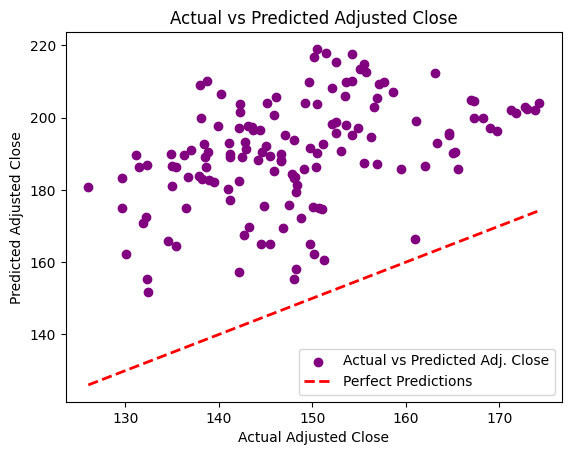

103/103 [==============================] - 0s 1ms/step


In [72]:
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Dropout

model = keras.Sequential();

model.add(keras.layers.Dense(6, activation='relu', input_shape=(6,)))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


# Reset the df back to pre-shift to prepare for the monthly shift
df_aapl = pd.read_csv('AAPL.csv')

# Assign the target adj close (what we are trying to predict)
# to be the subsequent row's adjusted close on the following day
df_aapl['Target Adj Close'] = df_aapl['Adj Close'].shift(-2520)

# Drop the last row to handle NaN values created by the shift
df_aapl_non = df_aapl.dropna()

# y_aapl = df_aapl_non['Target Adj Close']

# # Note that we drop the expected EPS and acutal EPS since this is for a non-earnings day sequence, which means that EPS data is not relevant
# # since we are not considered earnings per share (EPS) estimates
# X_aapl = df_aapl_non.drop(['Adj Close', 'Target Adj Close', 'Date', 'Estimated EPS', 'Actual EPS'], axis=1)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_aapl, y_aapl, test_size=0.2)

# Specify the date to split the data
split_date = '2012-06-01'

# Convert the date column to datetime format if needed
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])

# Create training and testing sets
train_set = df_aapl[df_aapl['Date'] < split_date]
test_set = df_aapl[df_aapl['Date'] >= split_date]

# Separate features (X) and target variable (y) for training and testing
y_train = train_set['Target Adj Close']
X_train = train_set.drop(['Adj Close', 'Target Adj Close', 'Date', 'Estimated EPS', 'Actual EPS'], axis=1)

y_test = test_set['Target Adj Close']
X_test = test_set.drop(['Adj Close', 'Target Adj Close', 'Date', 'Estimated EPS', 'Actual EPS'], axis=1)




# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler
X_test_scaled = scaler.transform(X_test)


model.fit(X_train_scaled, y_train, epochs=200, callbacks=[keras.callbacks.EarlyStopping(patience=5)])

y_pred = model.predict(X_test_scaled)

# Create a DataFrame to display actual values and predictions
results_df = pd.DataFrame({'Predicted': y_pred.flatten(), 'Actual': y_test})

# Plot the predictions and actual results
plt.scatter(results_df['Actual'], results_df['Predicted'], color='purple', label='Actual vs Predicted Adj. Close')
# plt.scatter(results_df.index, results_df['Predicted'], color='green', label='DNN')
# plt.scatter(results_total_df_dnn.index, results_total_df_dnn['Predicted'], color='red', label='Actual')

# Plot a diagonal line representing perfect predictions
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')

plt.xlabel('Actual Adjusted Close')
plt.ylabel('Predicted Adjusted Close')
plt.title('Actual vs Predicted Adjusted Close')
plt.legend()
plt.show()

# Custom predictor below
# fut_data = np.array([19.695715,19.716785,19.282143,19.309643,426739600,0])
# fut_data_scaled = scaler.transform(fut_data.reshape(1,6))
# y_pred_fut = model.predict(fut_data_scaled.reshape(1,6), batch_size=1)
# print(f"2031 prediction: {y_pred_fut}")


df_aapl_total = pd.read_csv('AAPL.csv')

df_aapl_total = df_aapl_total.dropna(subset=['Date'])

X_aapl_total = df_aapl_total.drop(['Adj Close', 'Date', 'Estimated EPS', 'Actual EPS'], axis=1)

# Create a new value for all predictions
X_total_scaled = scaler.transform(X_aapl_total)

predictions_total = model.predict(X_total_scaled)
results_total_df_dnn = pd.DataFrame({'Predicted': predictions_total.flatten()})

# print("incoming results for looop")
# for i in range(len(predictions_total.flatten())):
#   print(predictions_total[i][0])

# A Visual Between Actual Values, Linear Regressor, and DNN

Possibly?

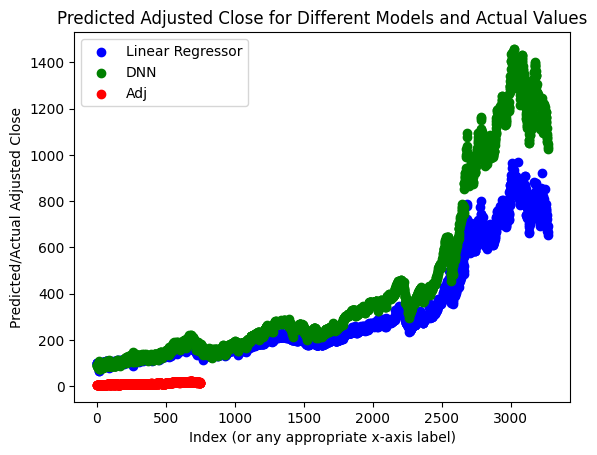

In [70]:
# Plot only Model 1 predictions
plt.scatter(results_total_df_lr.index, results_total_df_lr['Predicted'], color='blue', label='Linear Regressor')

# Plot only Model 2 predictions
plt.scatter(results_total_df_dnn.index, results_total_df_dnn['Predicted'], color='green', label='DNN')

# Plot actual values
df_aapl = pd.read_csv('AAPL.csv')

# Assign the target adj close (what we are trying to predict)
# to be the subsequent row's adjusted close on the following day
df_aapl['Target Adj Close'] = df_aapl['Adj Close'].shift(-2520)

# Drop the last row to handle NaN values created by the shift
df_aapl_non = df_aapl.dropna()

# Plot only Model 2 predictions
plt.scatter(df_aapl_non.index, df_aapl_non['Adj Close'], color='red', label='Adj')

plt.xlabel('Index (or any appropriate x-axis label)')
plt.ylabel('Predicted/Actual Adjusted Close')
plt.title('Predicted Adjusted Close for Different Models and Actual Values')
plt.legend()
plt.show()